## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [3]:
df.shape

(1030, 9)

## Data Analysis

In [4]:
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.000000   
25%            0.000000        932.000000       730.950000     7.000000   
50%            6.400000        968.000000       779.500000    28.000000   
75%           10.200000       1029.400000       824.000000    56.000000   
max           32.200000       1145.000000       992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

## Heatmap

<AxesSubplot: >

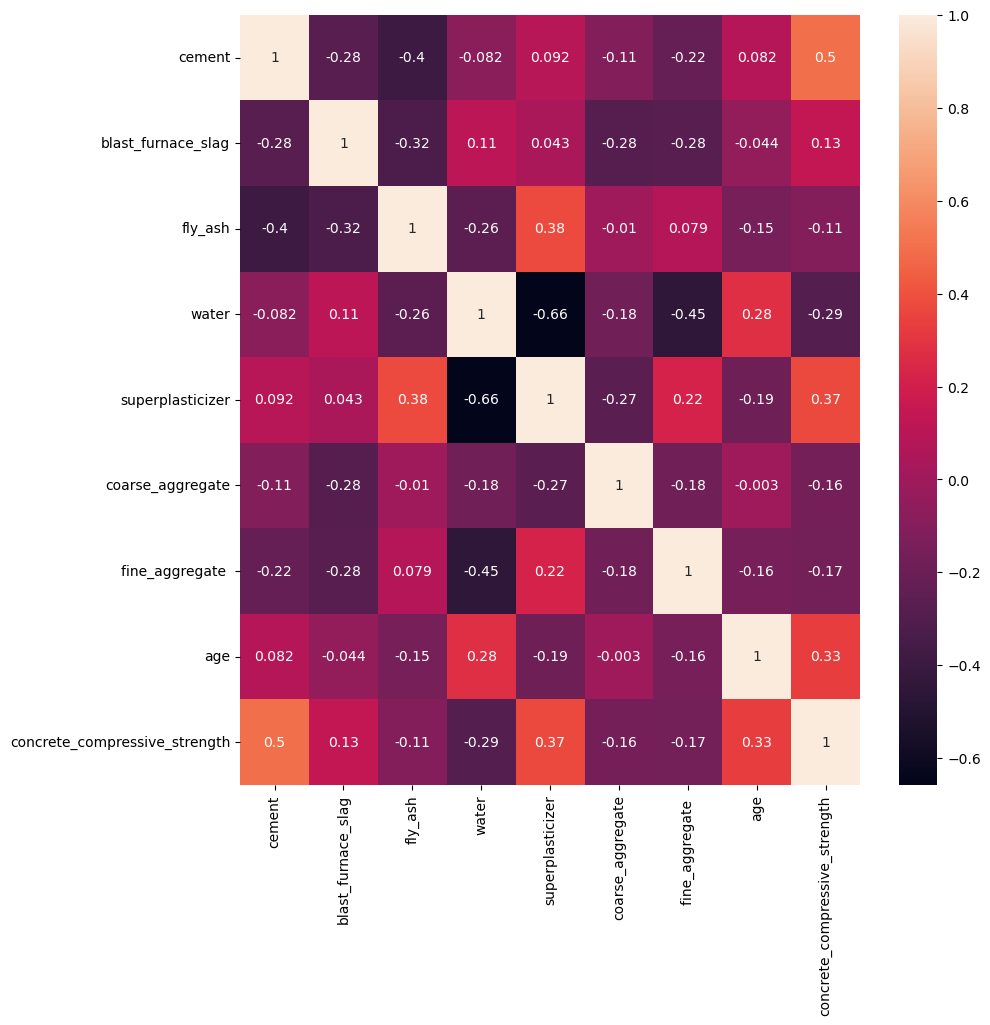

In [7]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

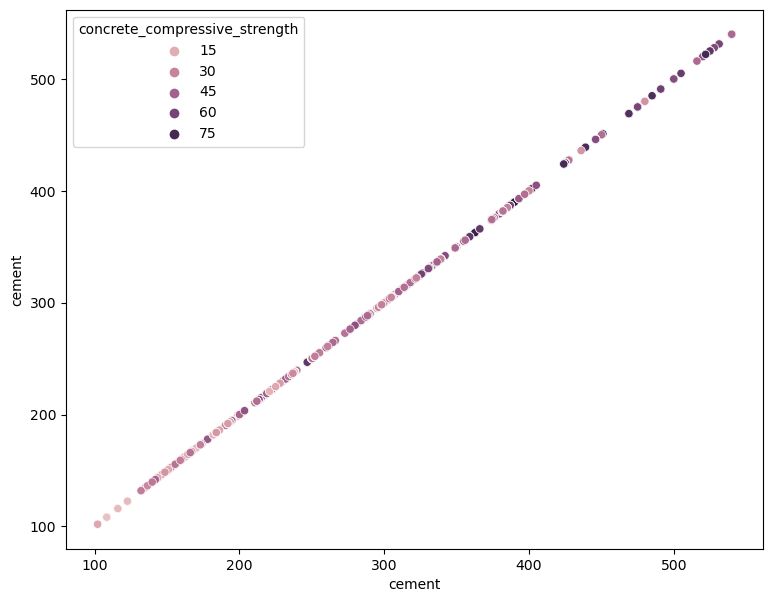

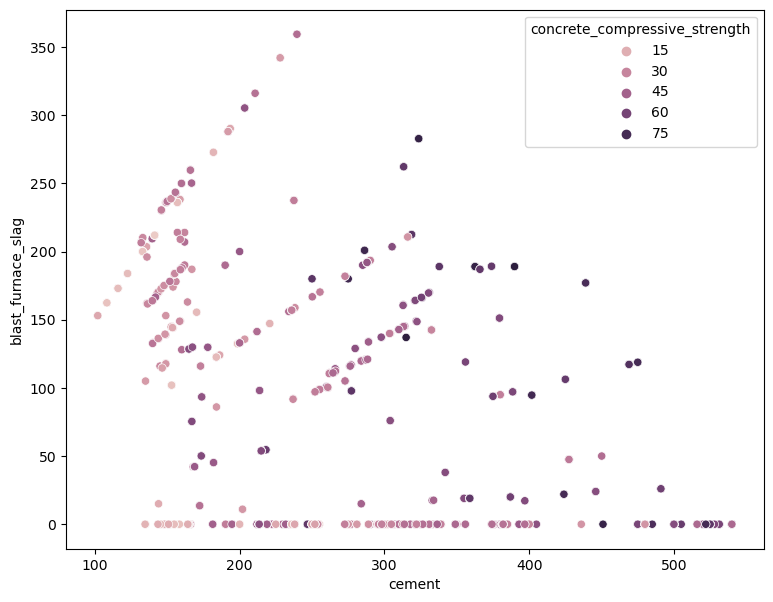

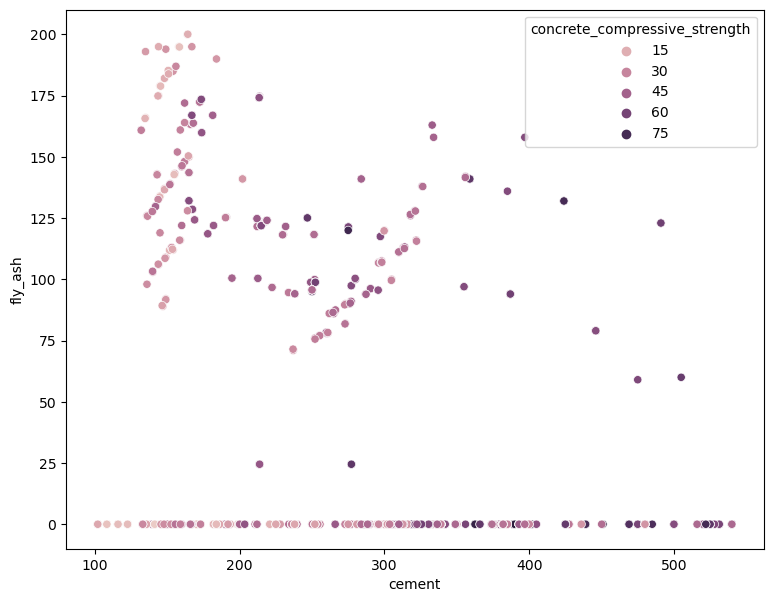

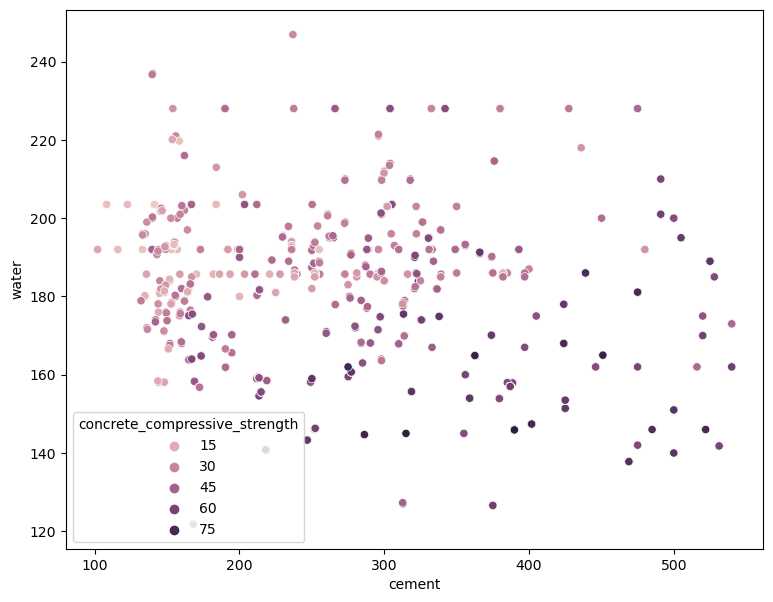

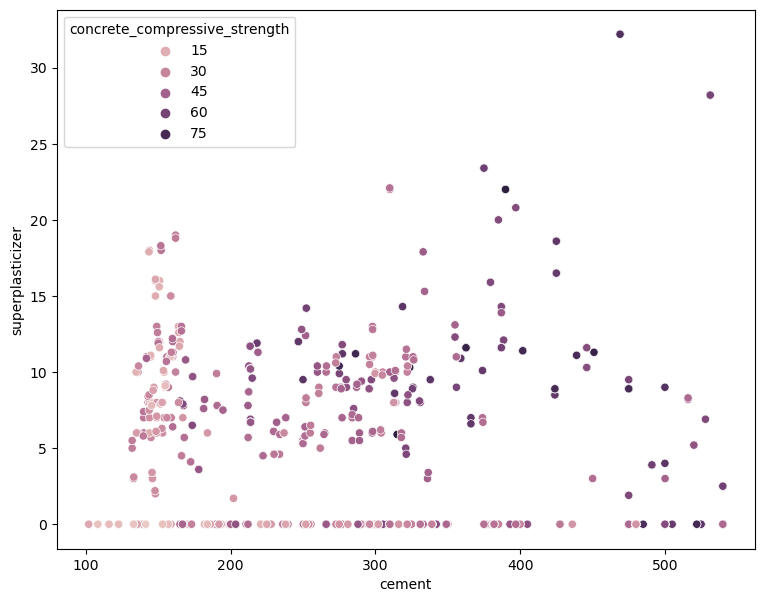

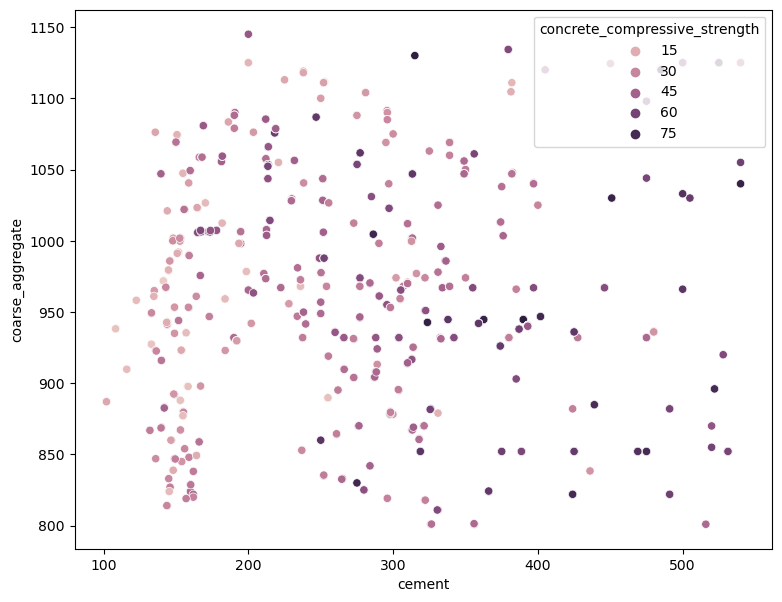

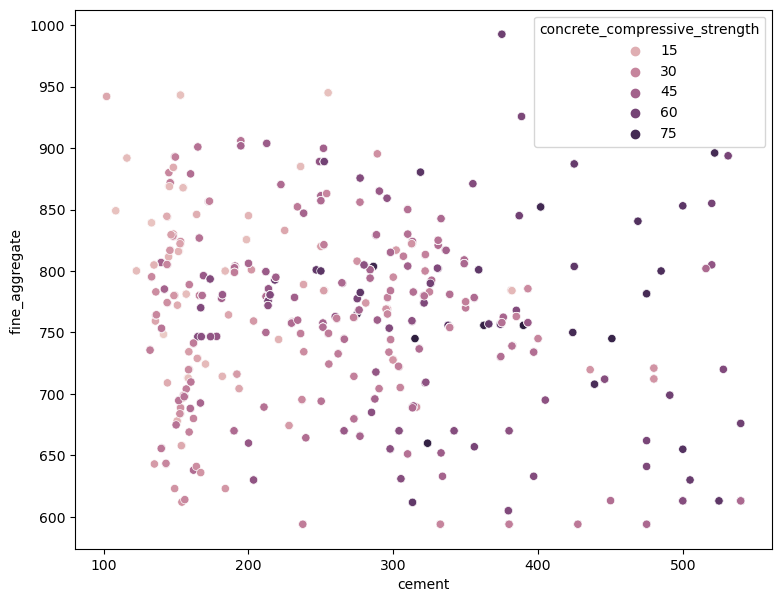

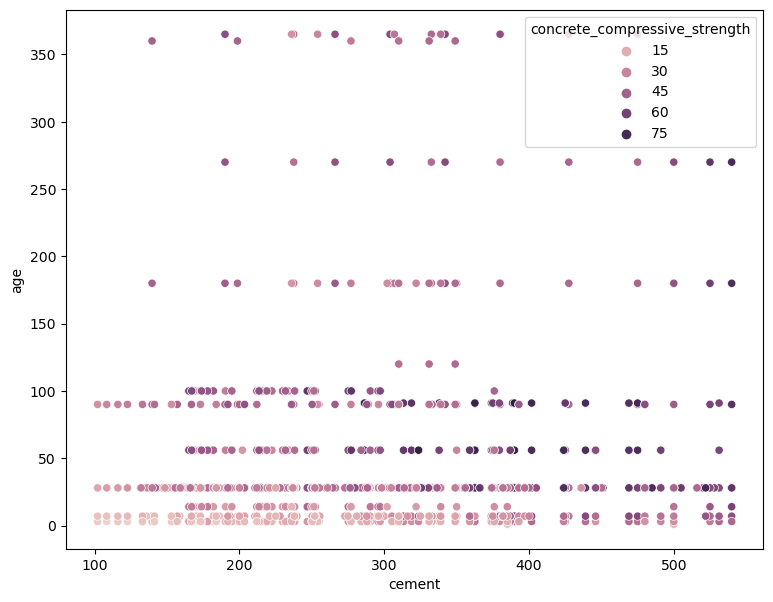

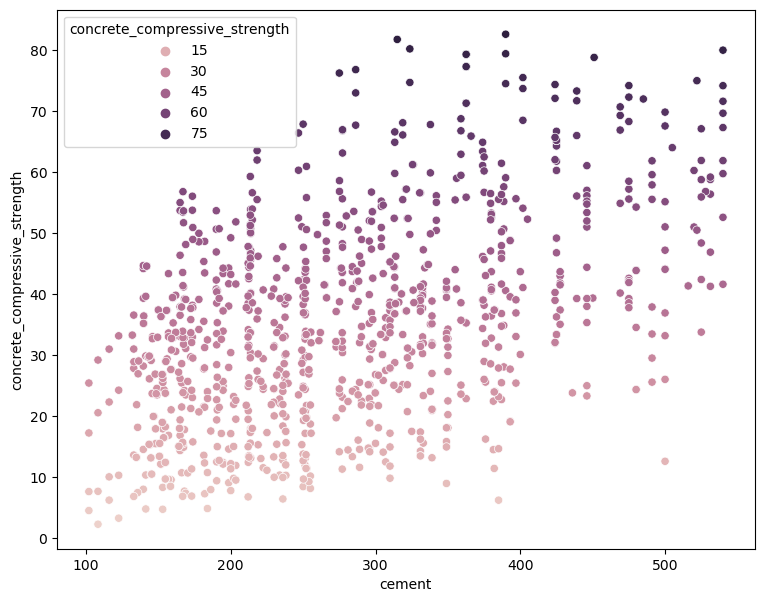

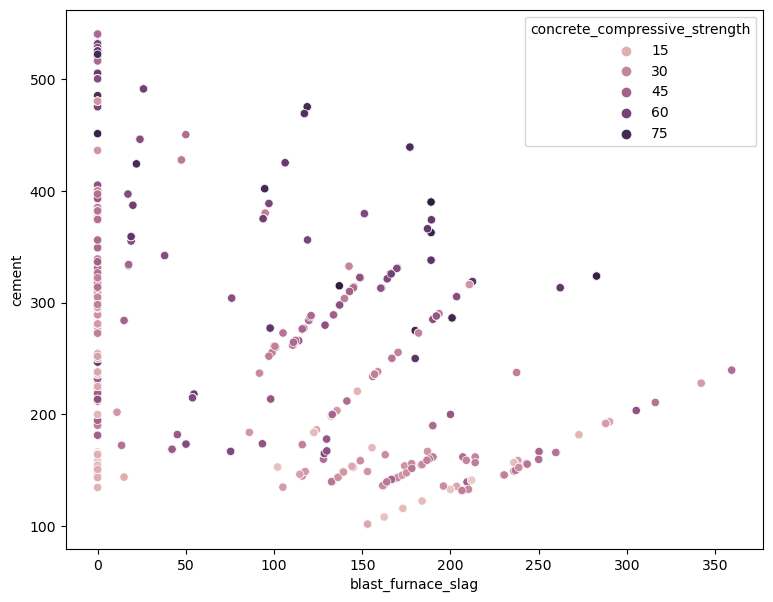

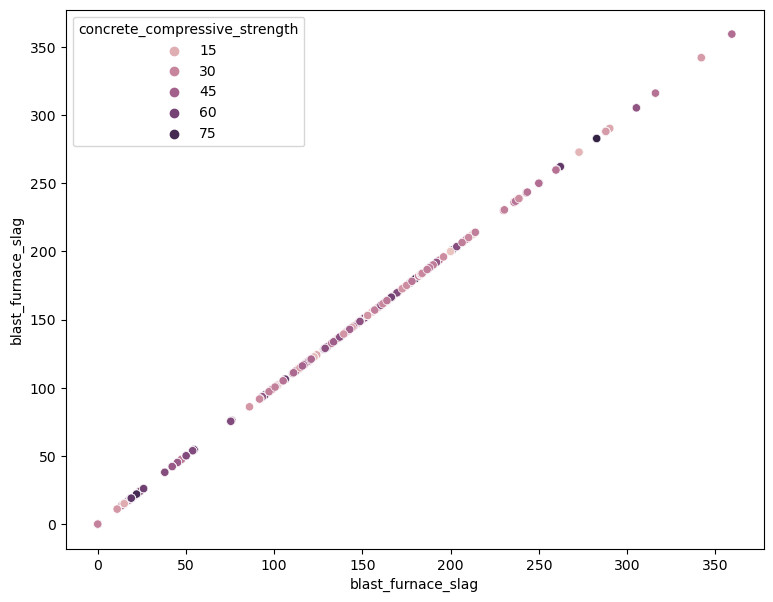

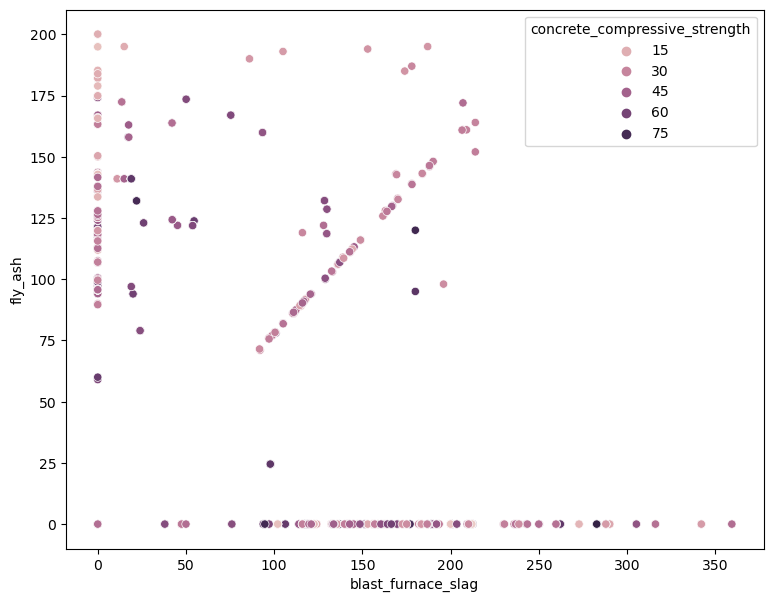

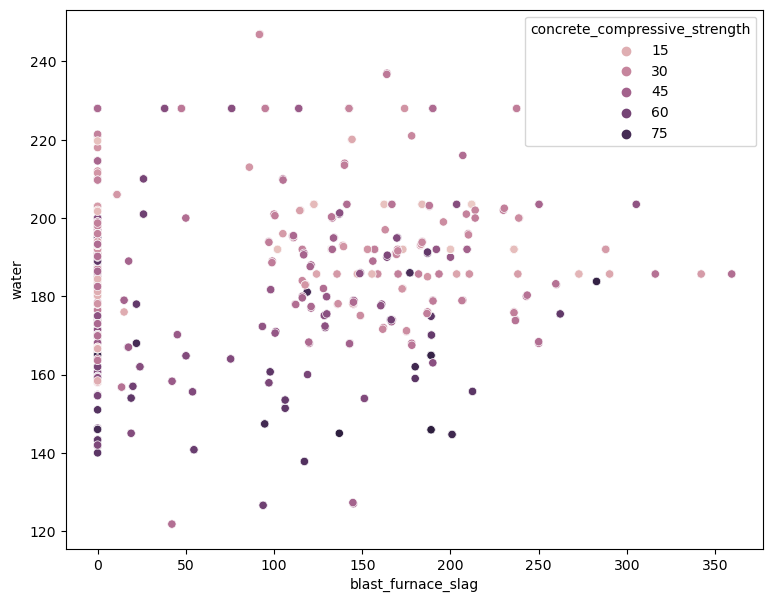

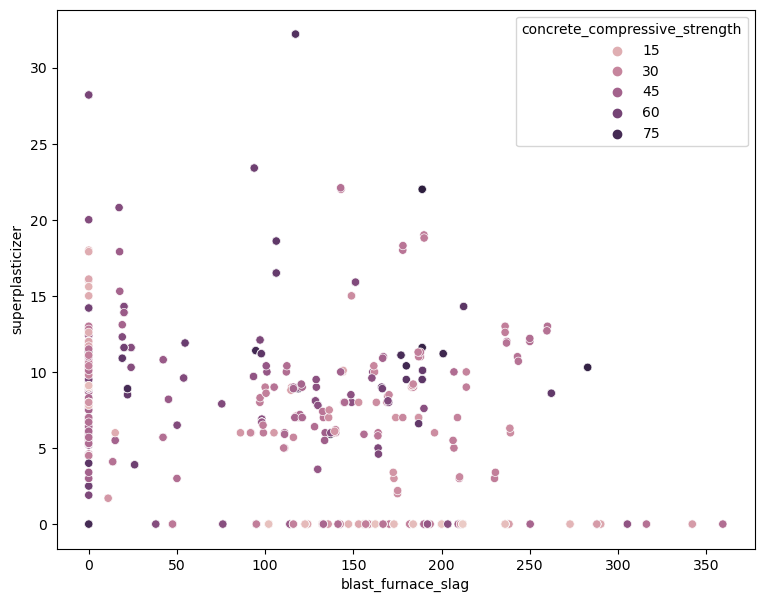

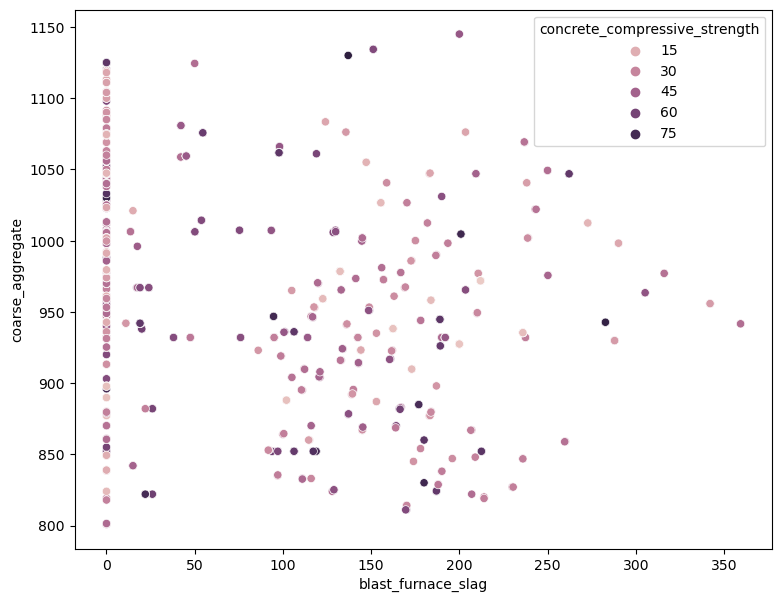

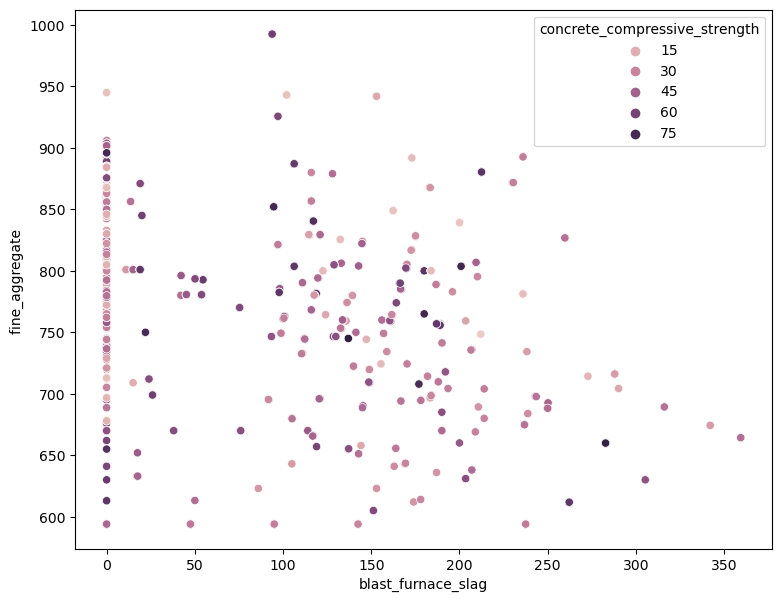

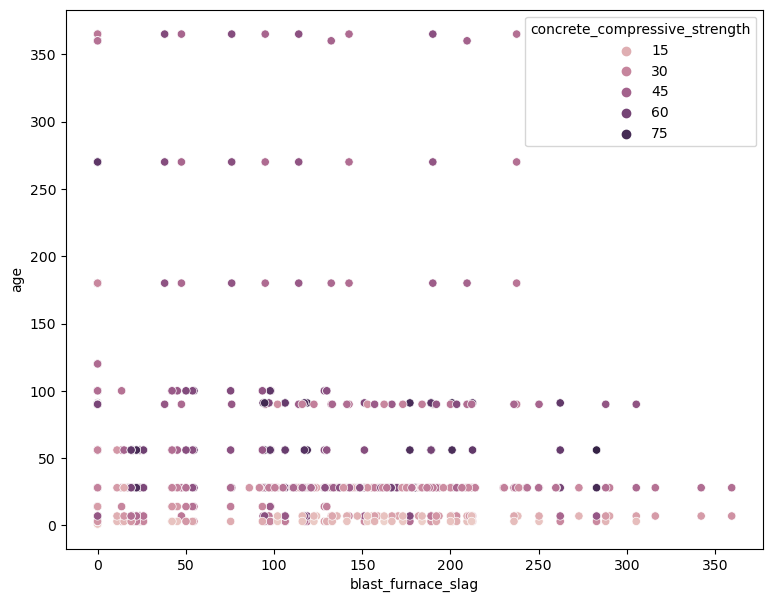

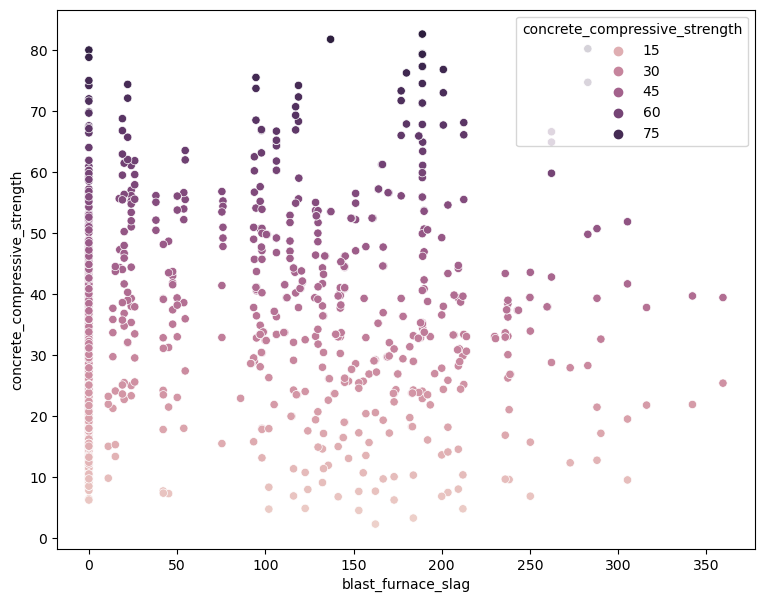

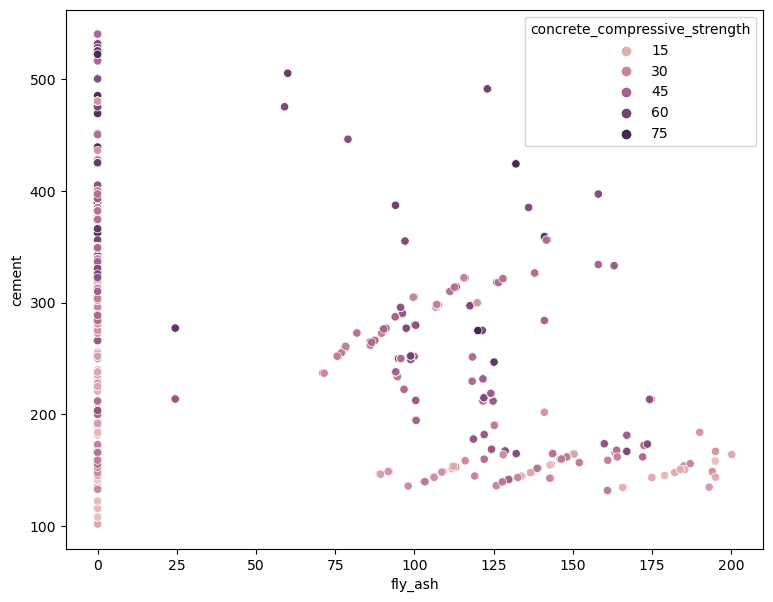

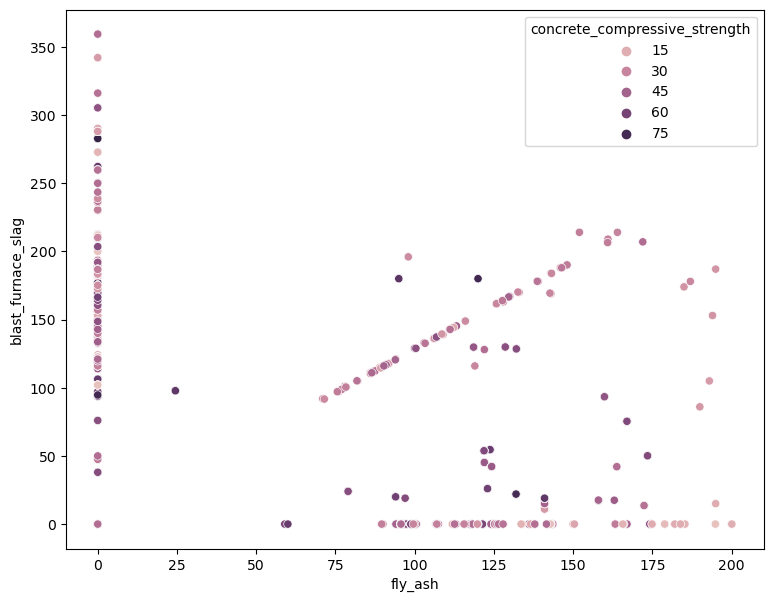

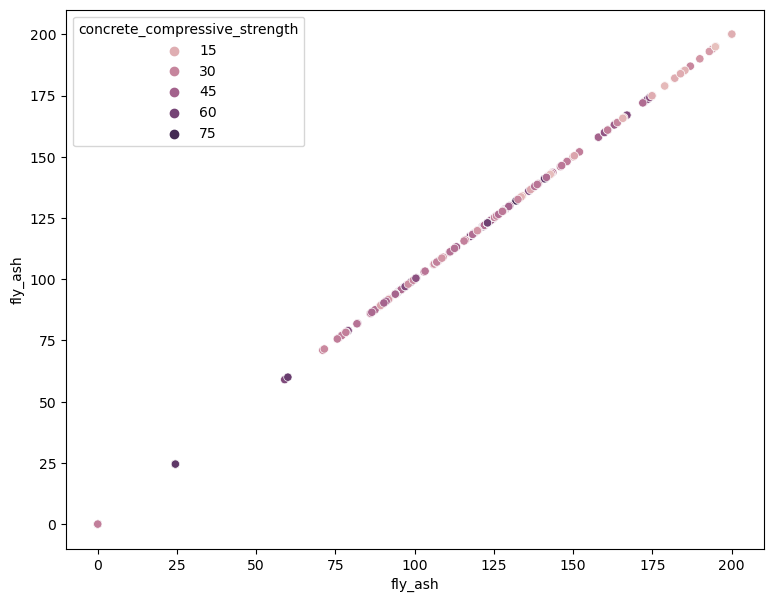

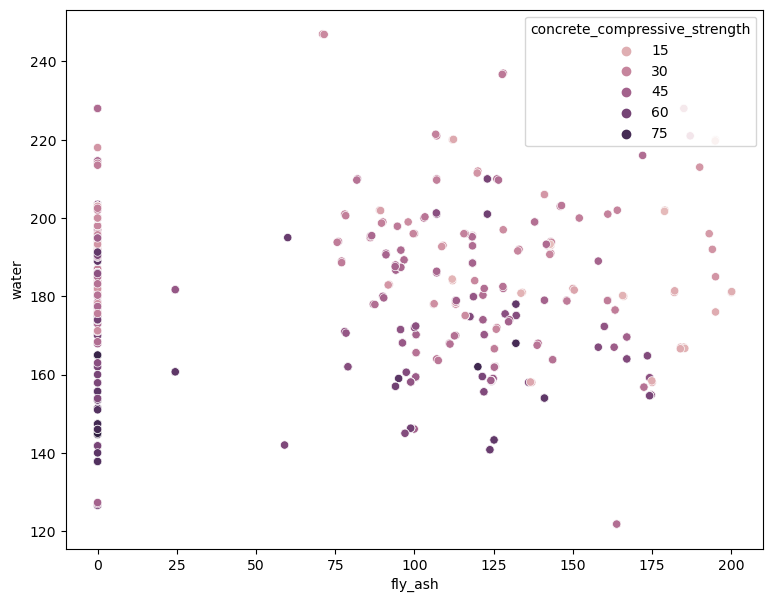

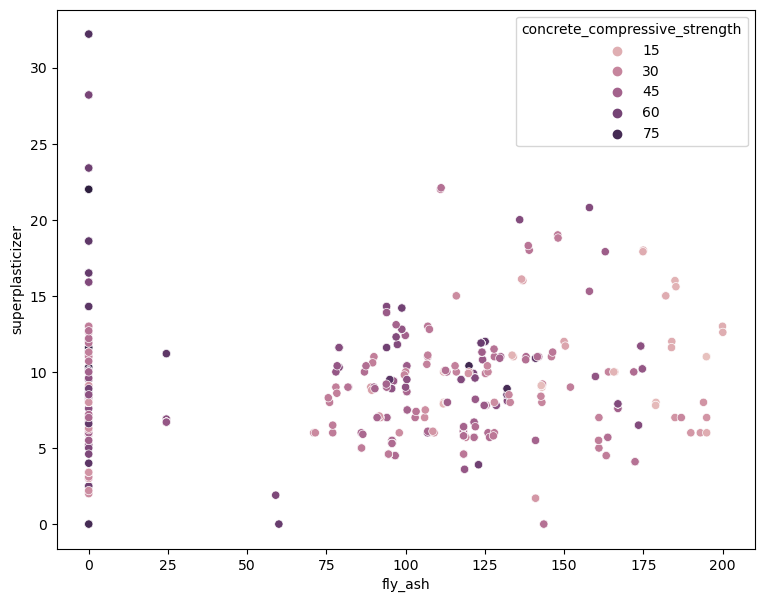

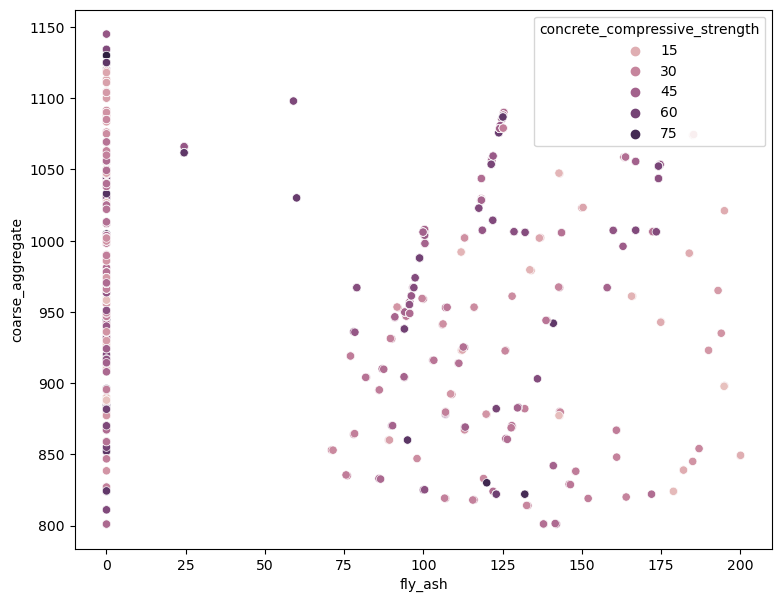

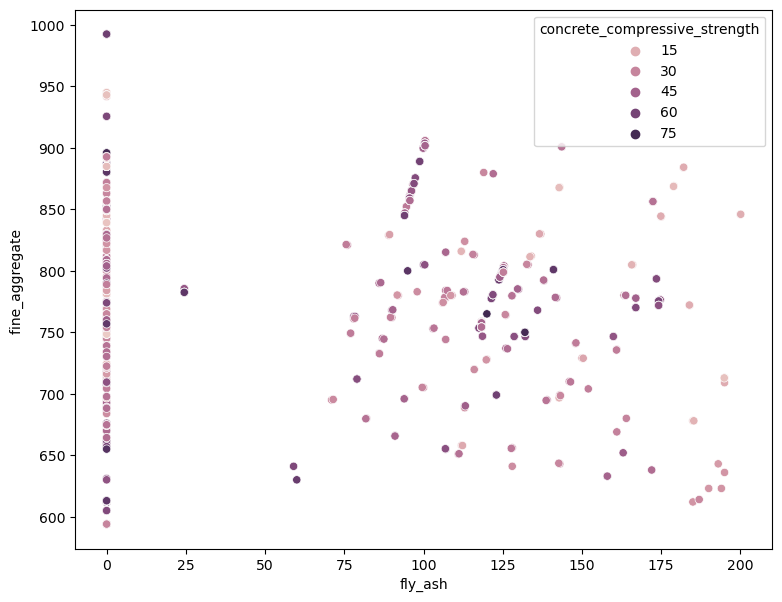

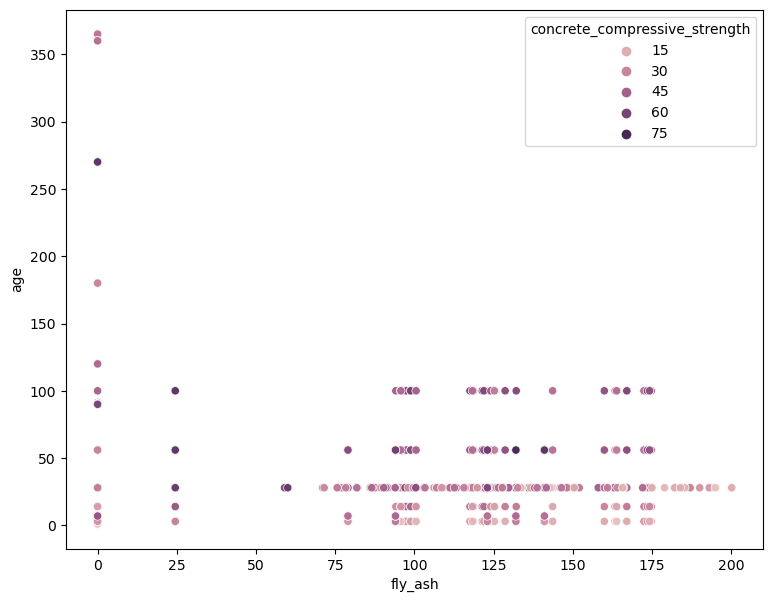

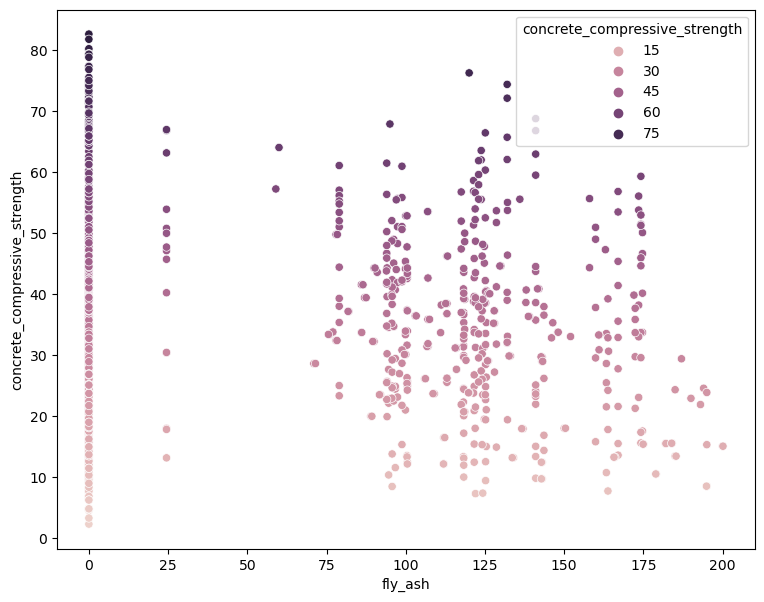

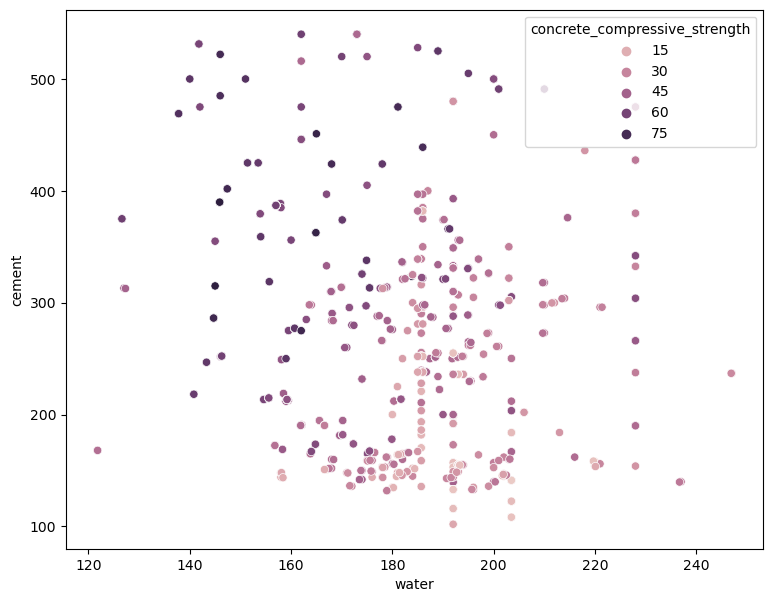

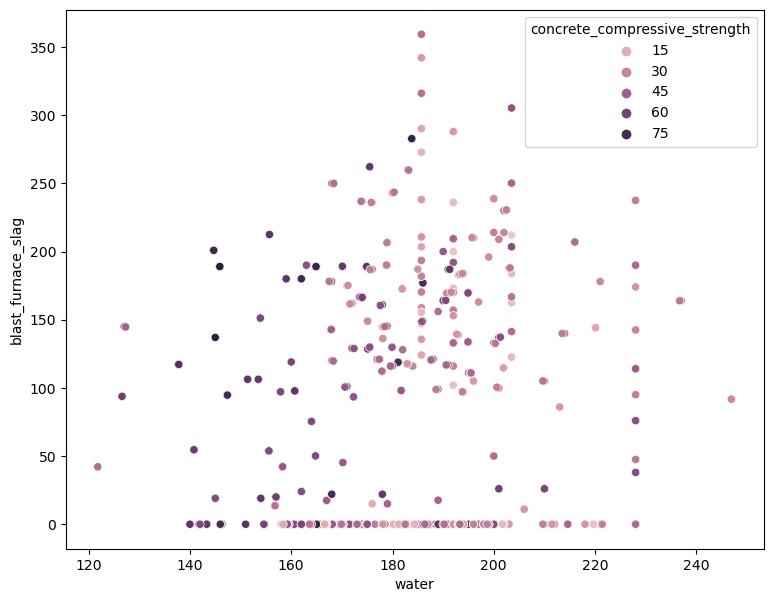

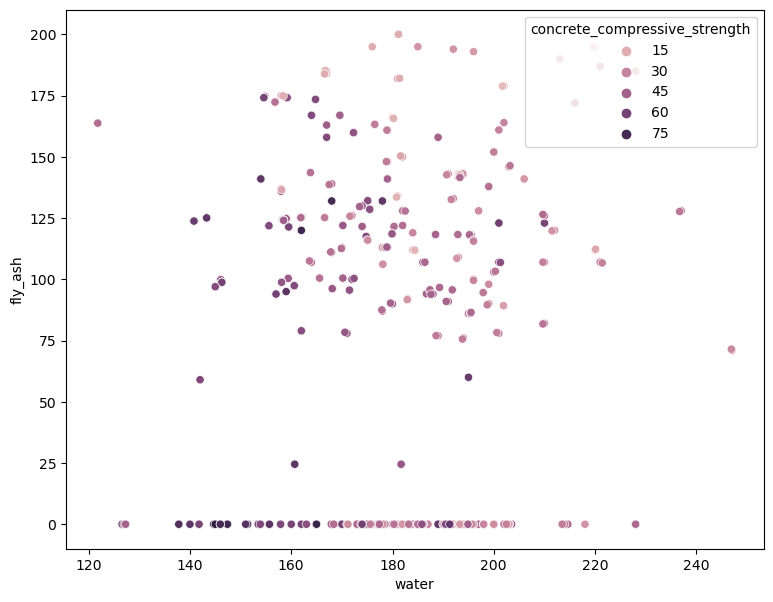

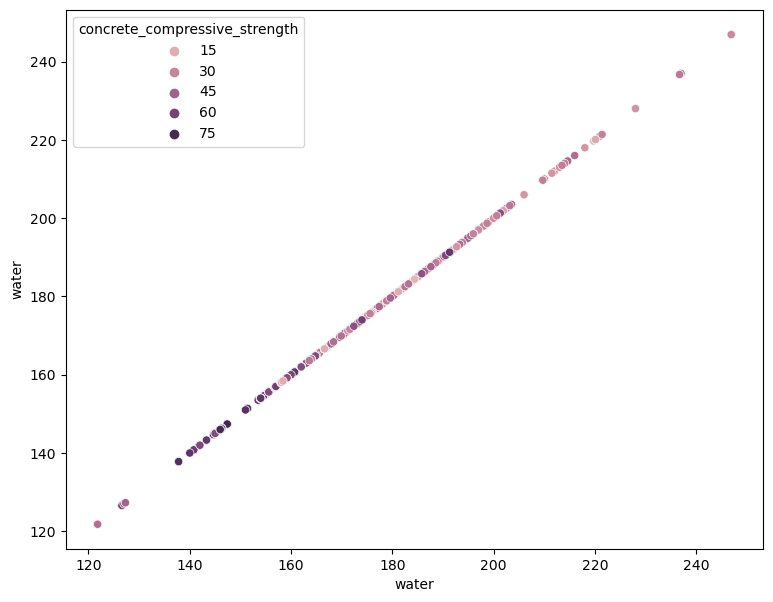

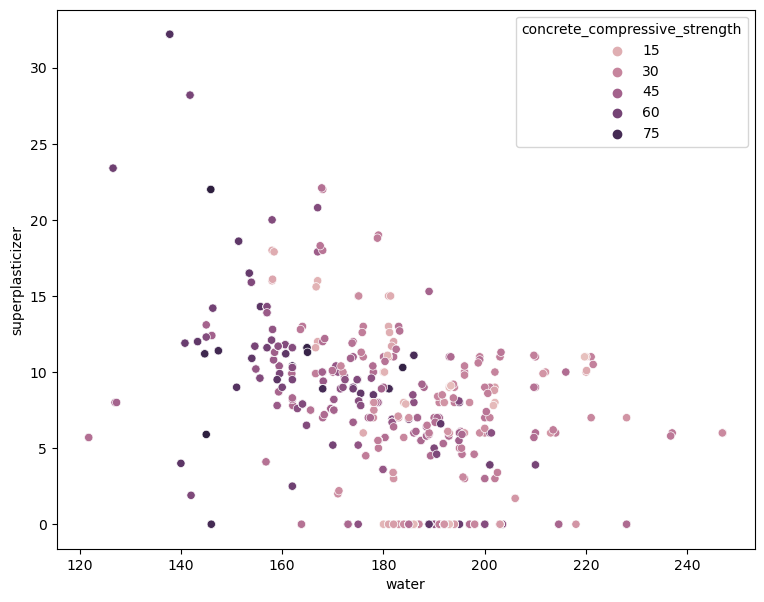

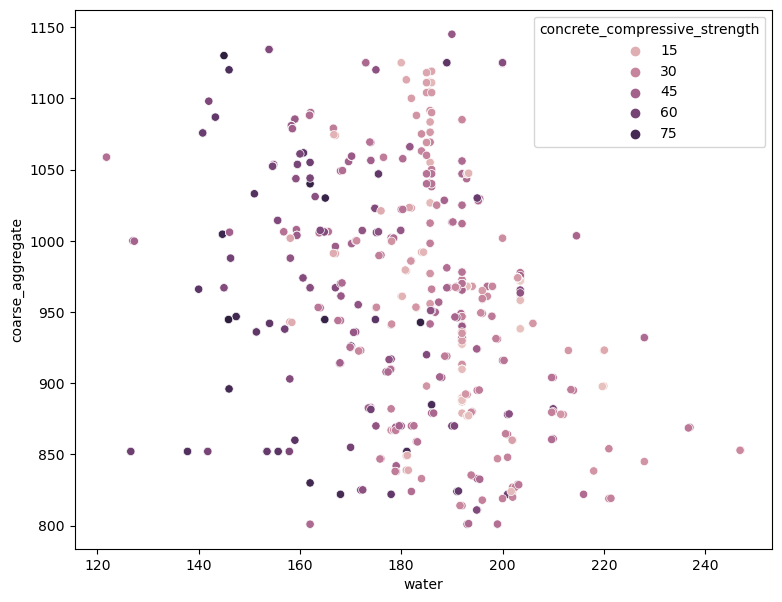

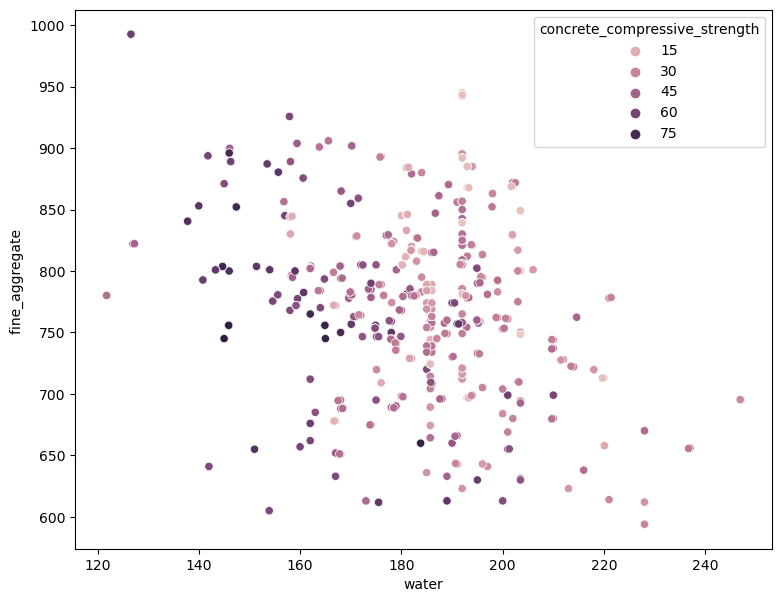

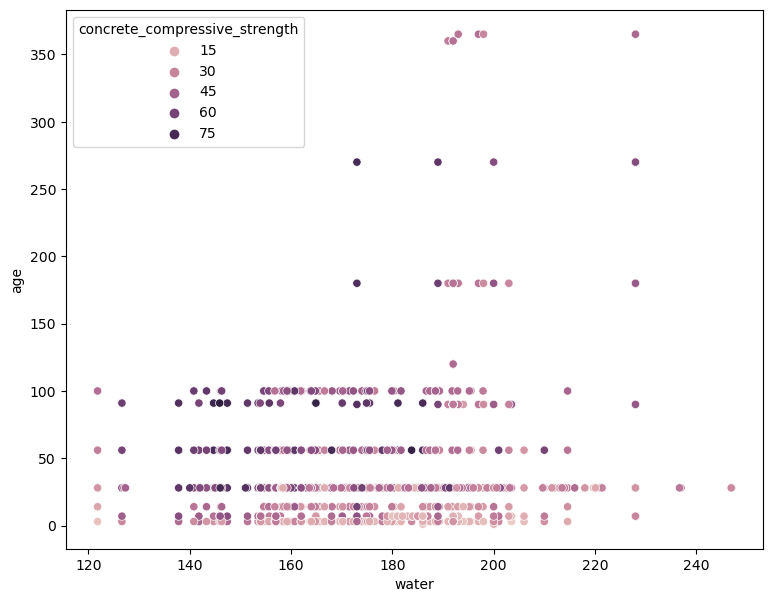

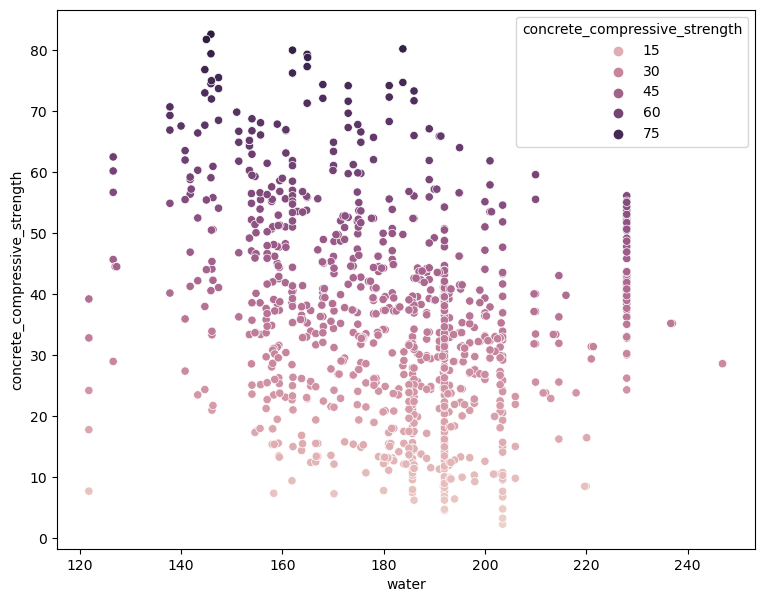

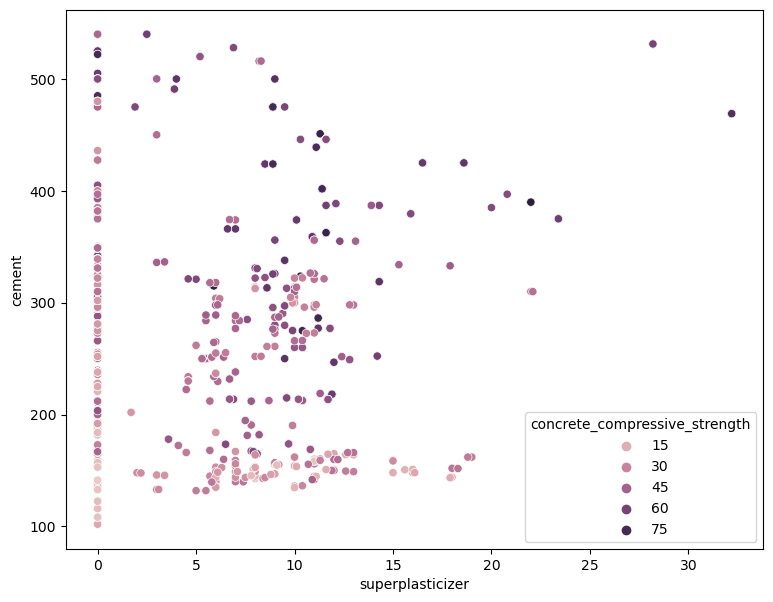

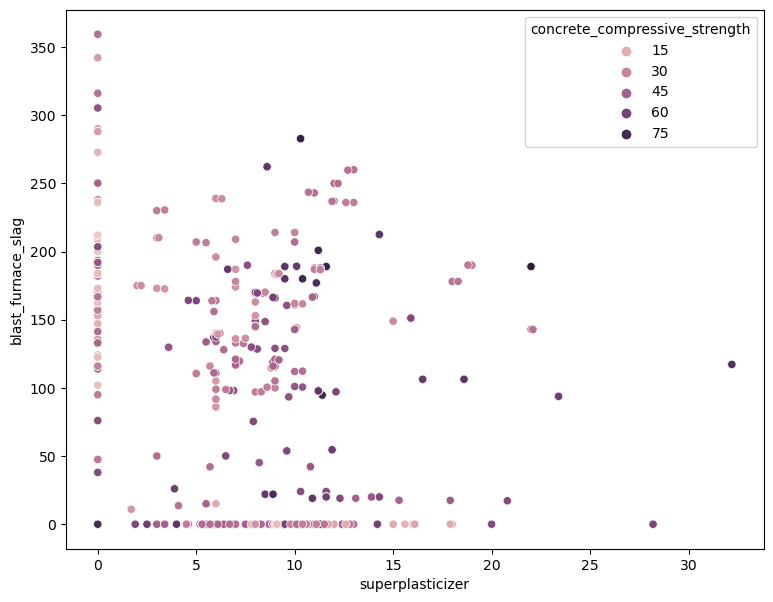

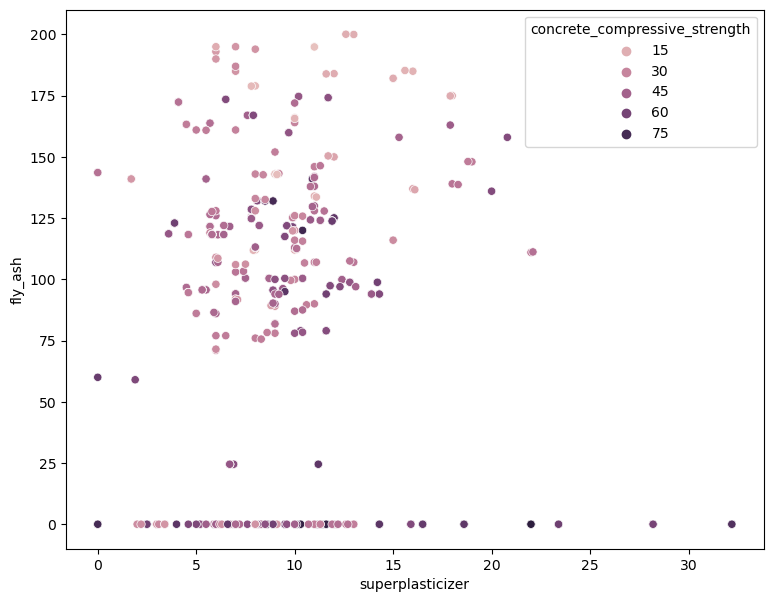

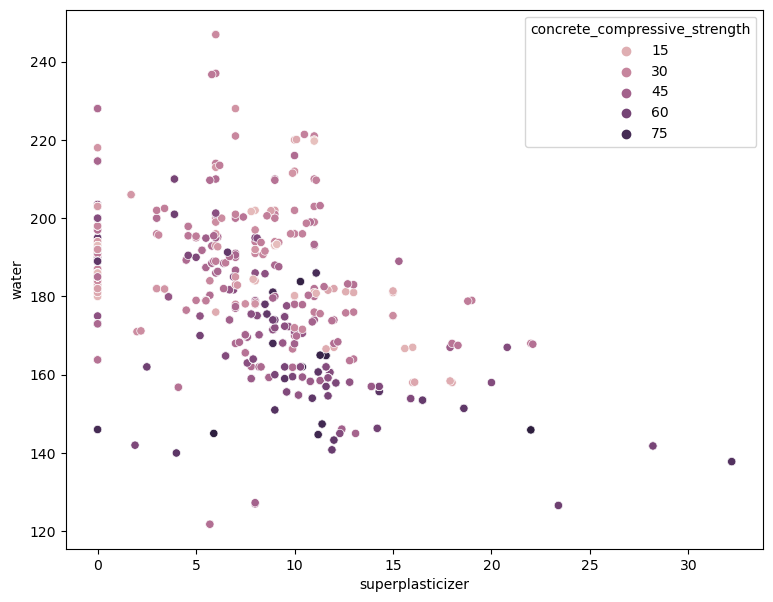

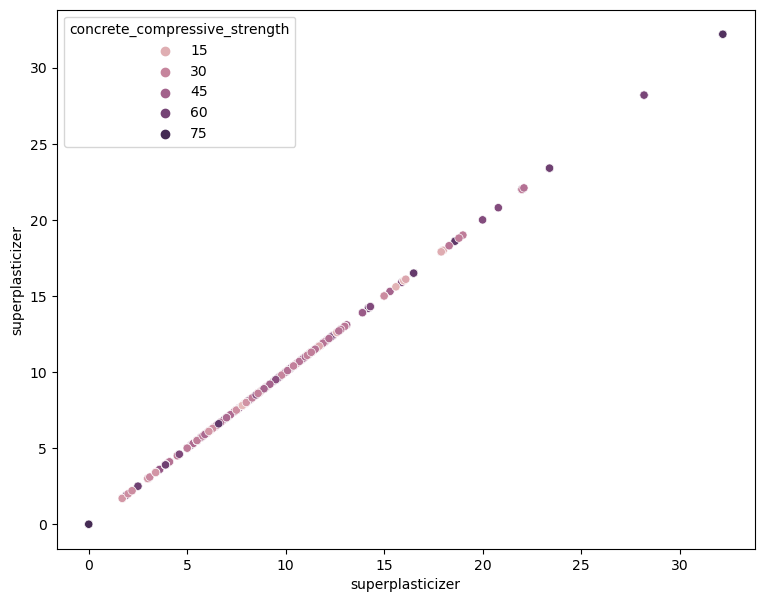

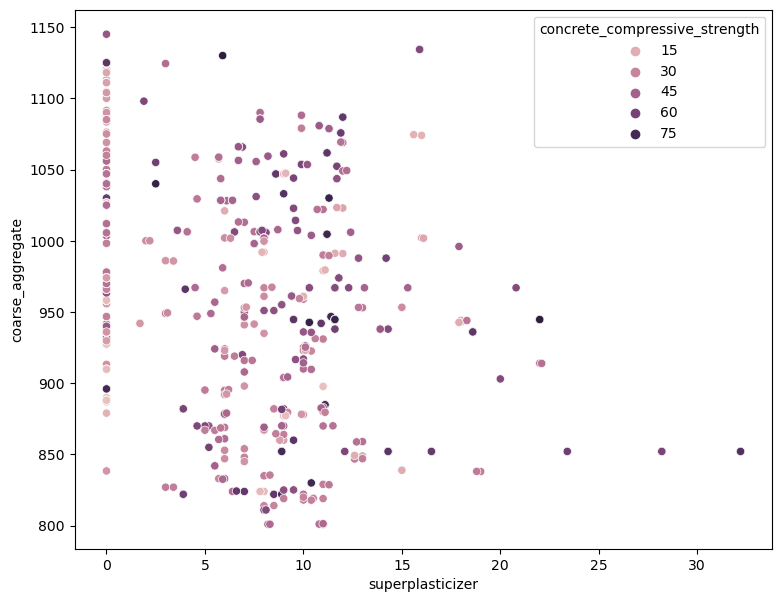

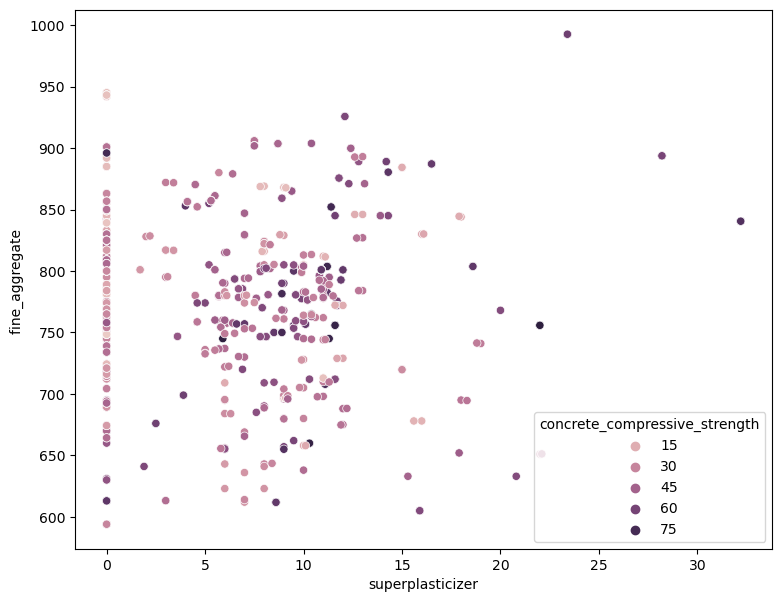

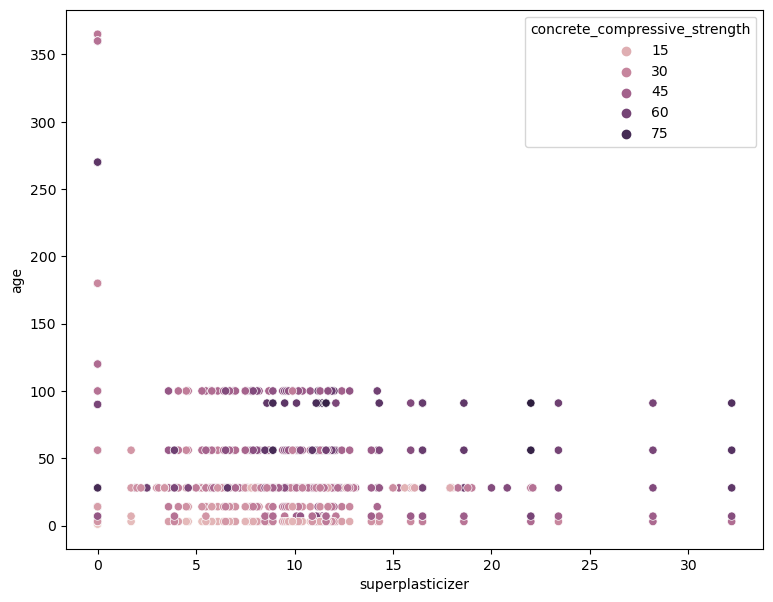

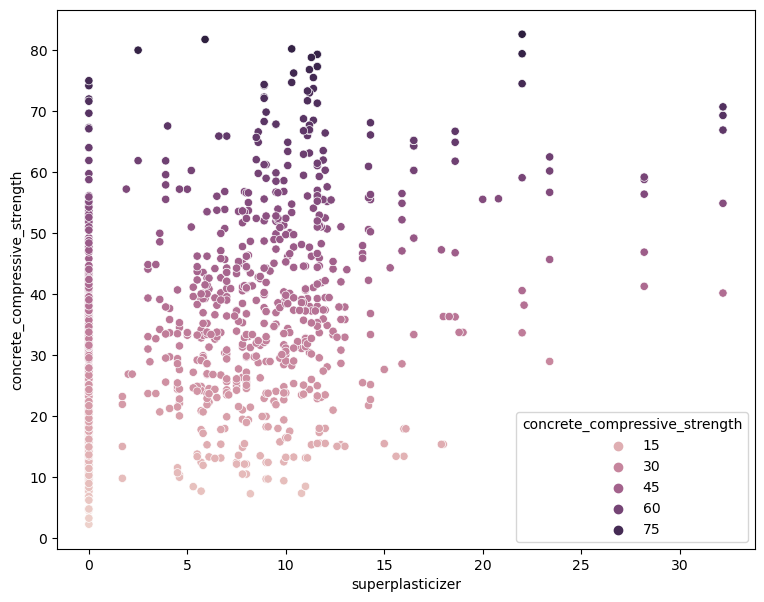

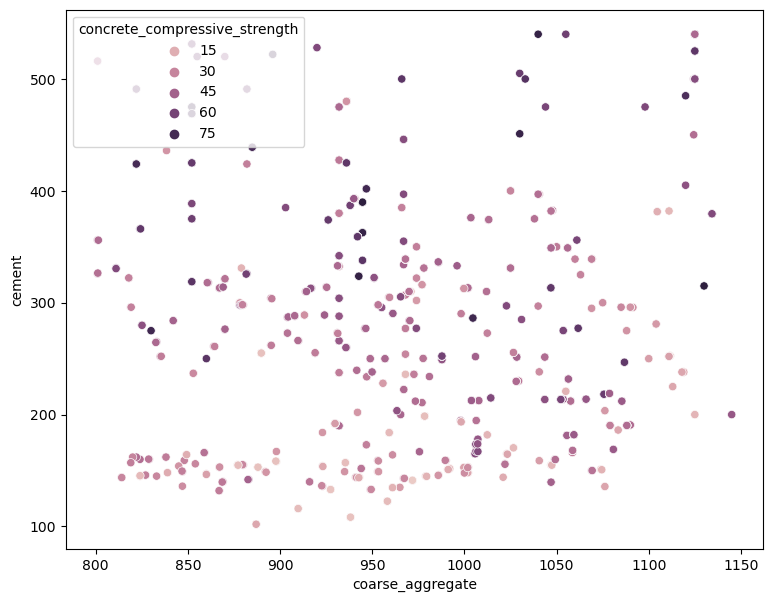

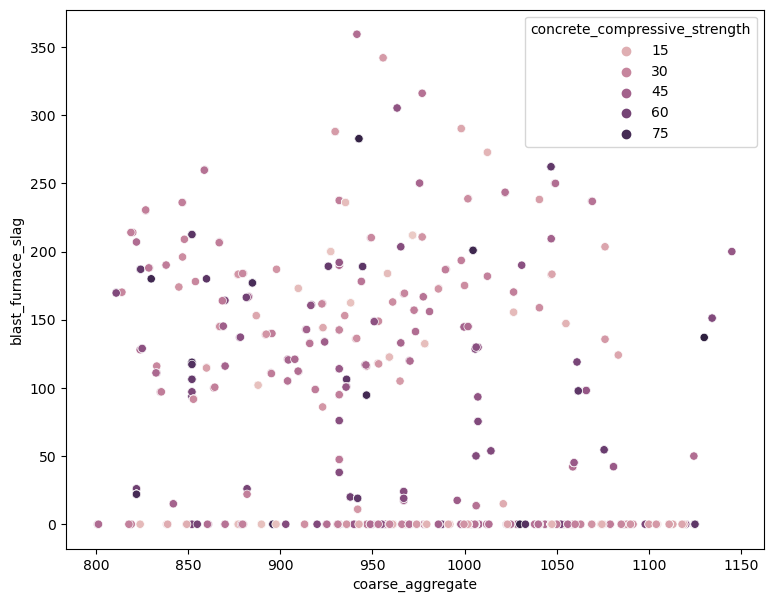

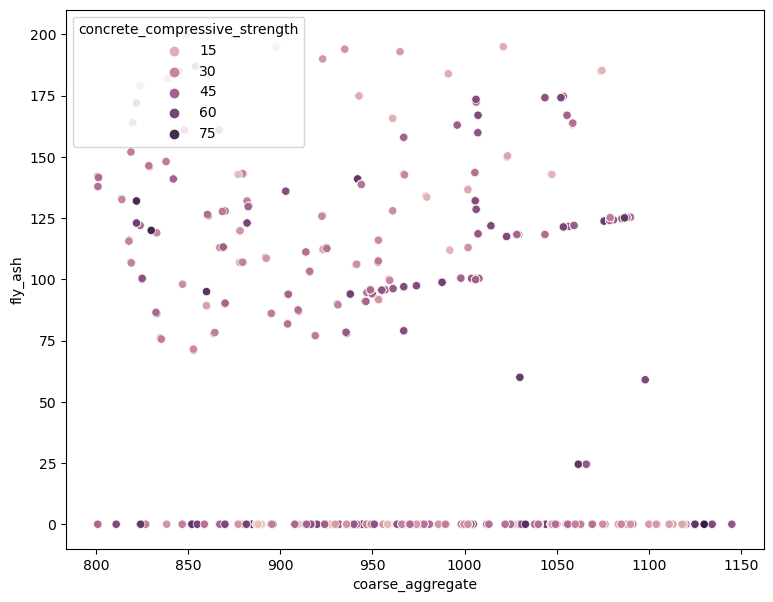

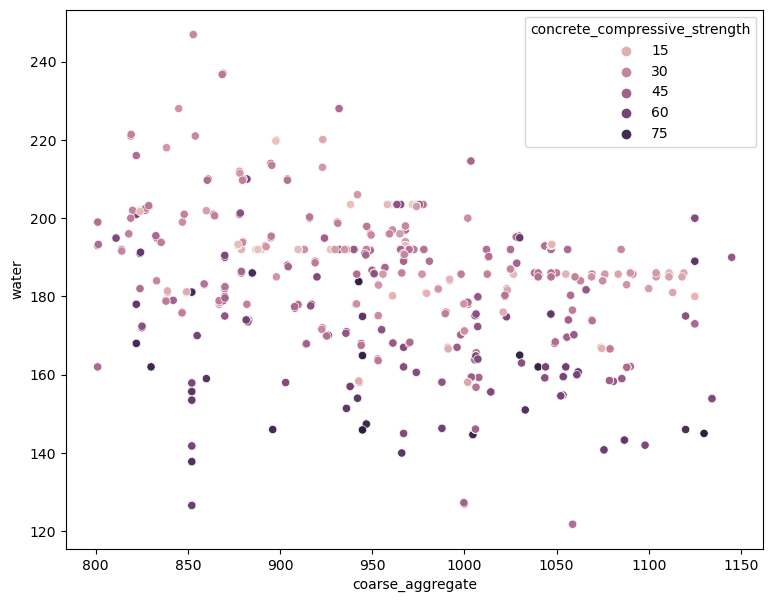

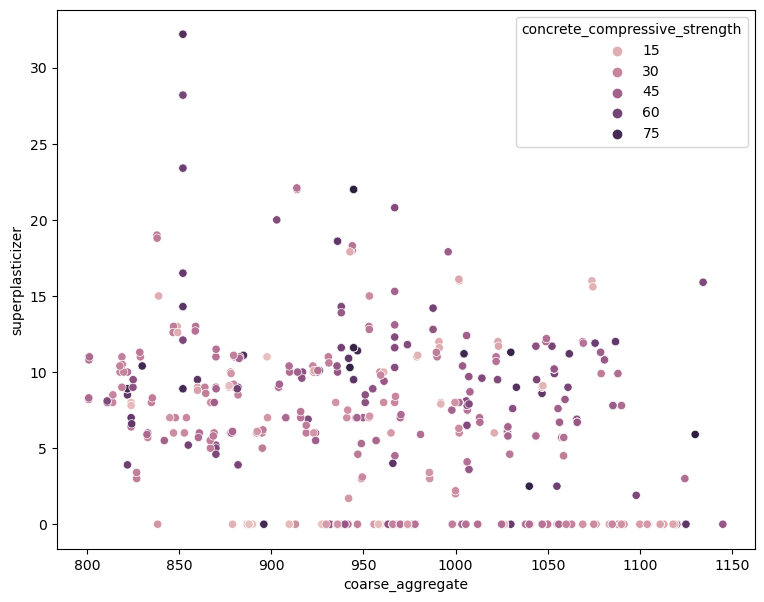

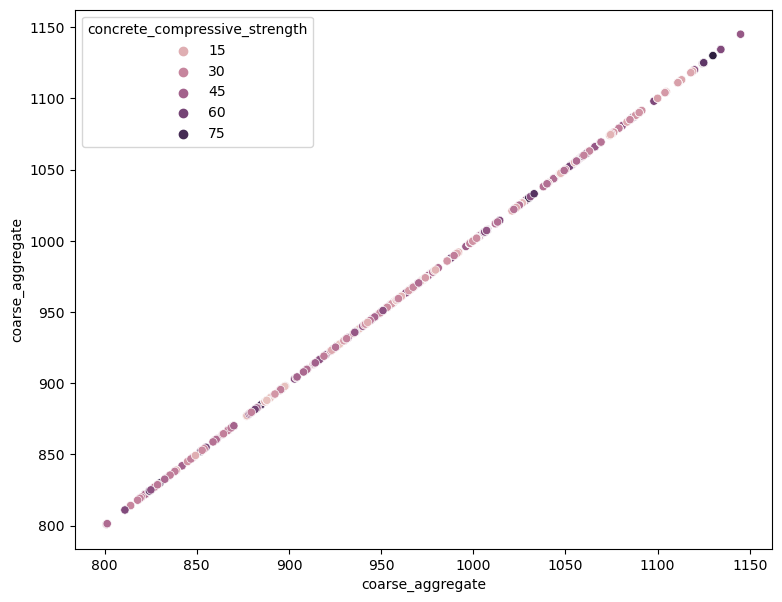

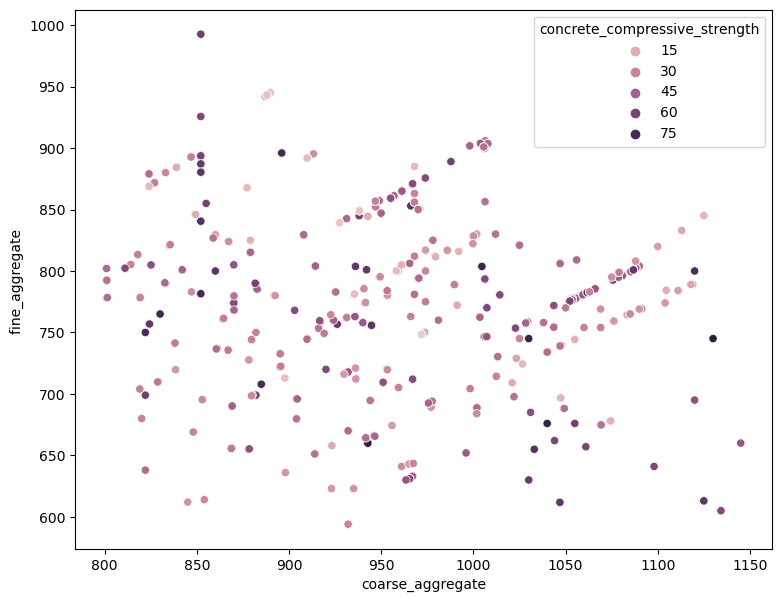

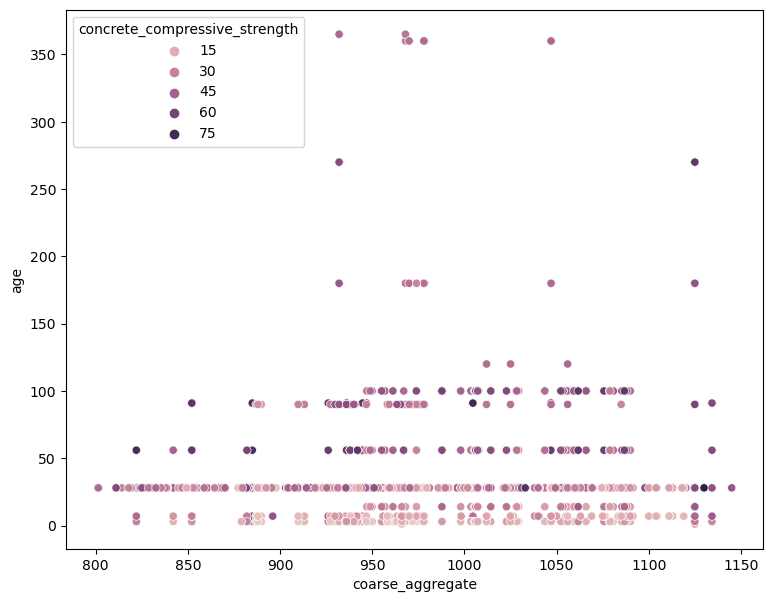

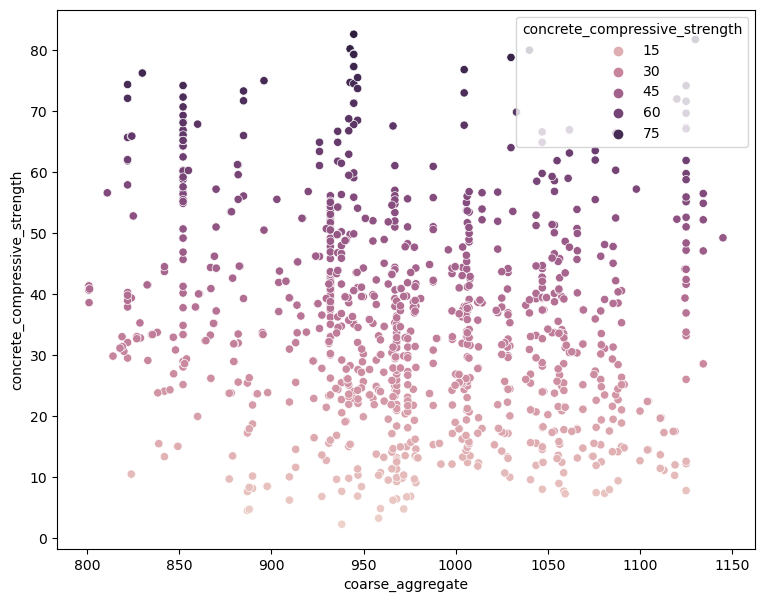

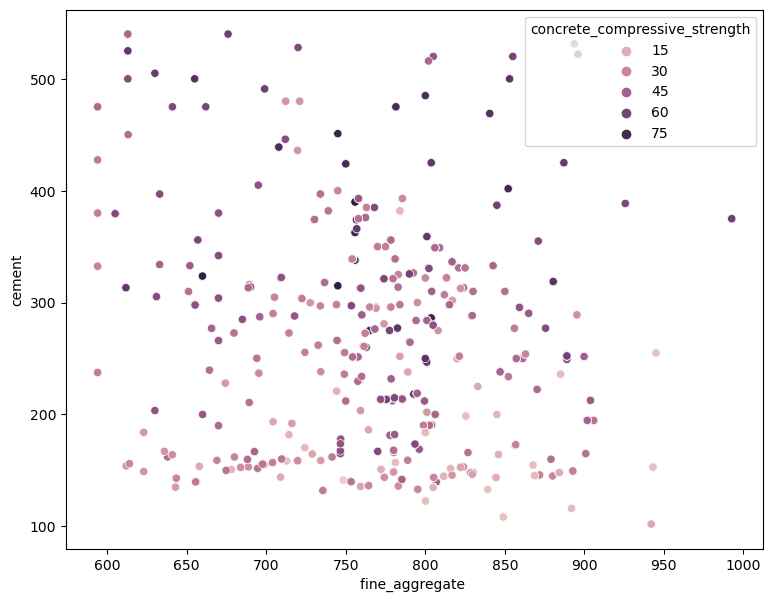

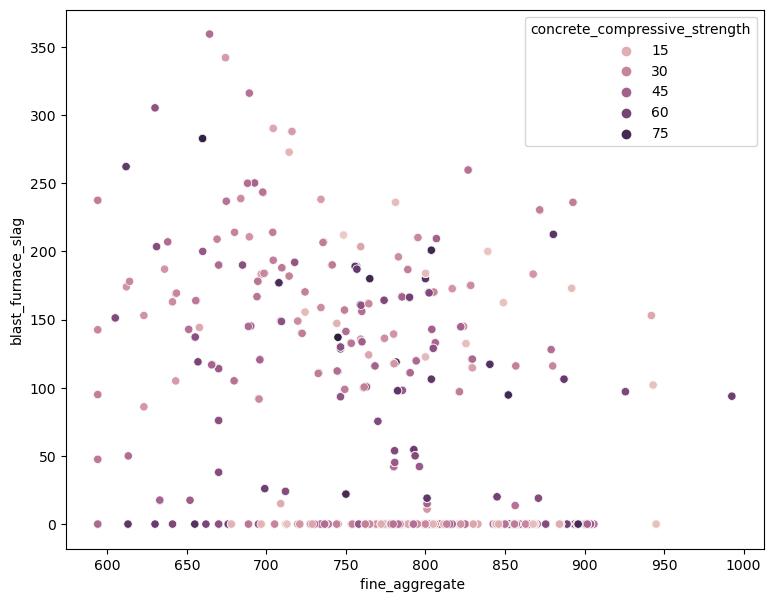

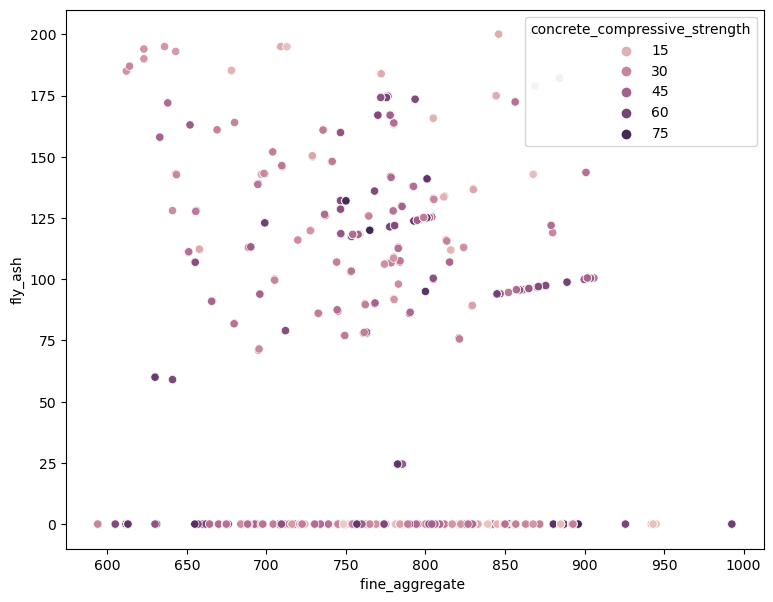

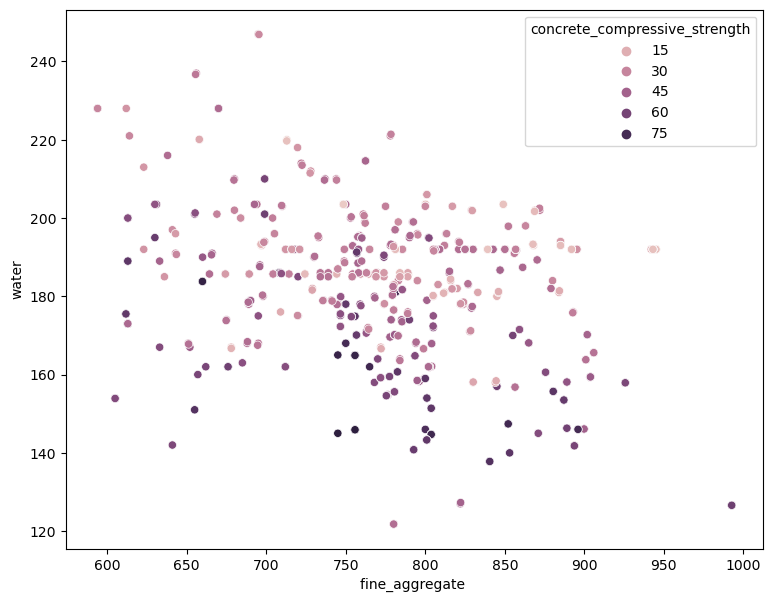

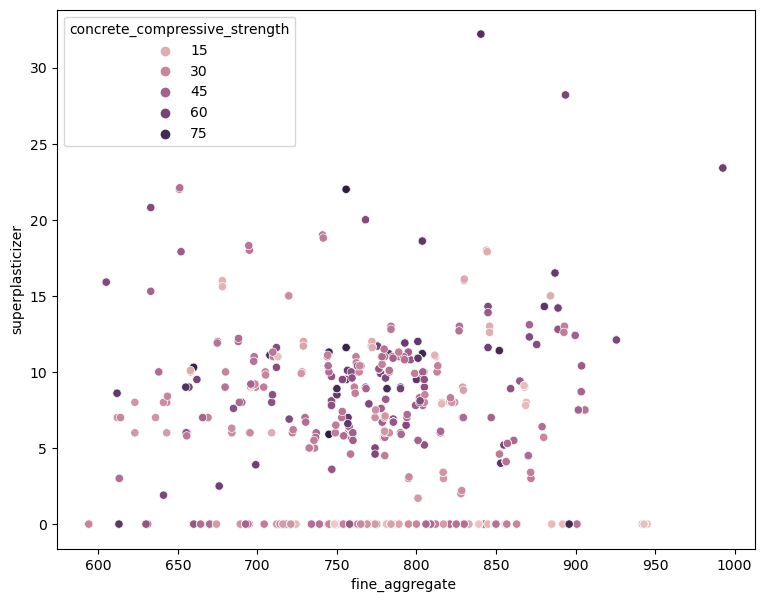

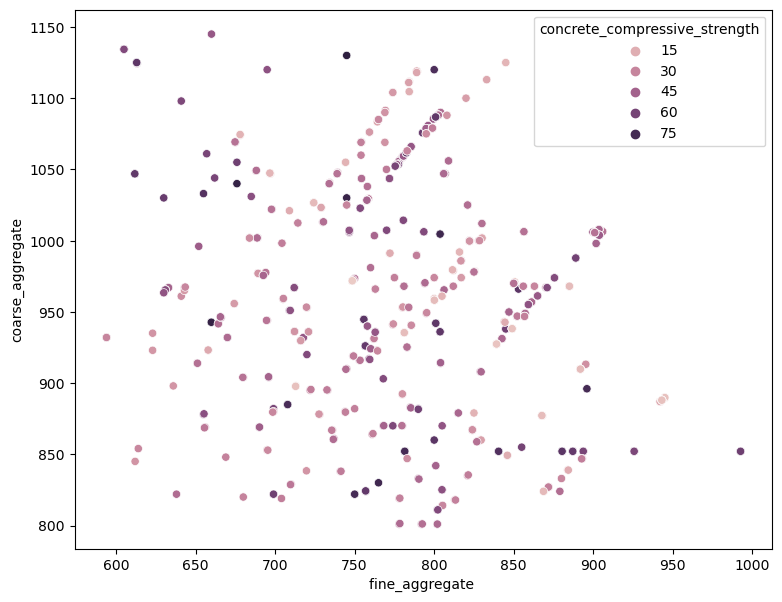

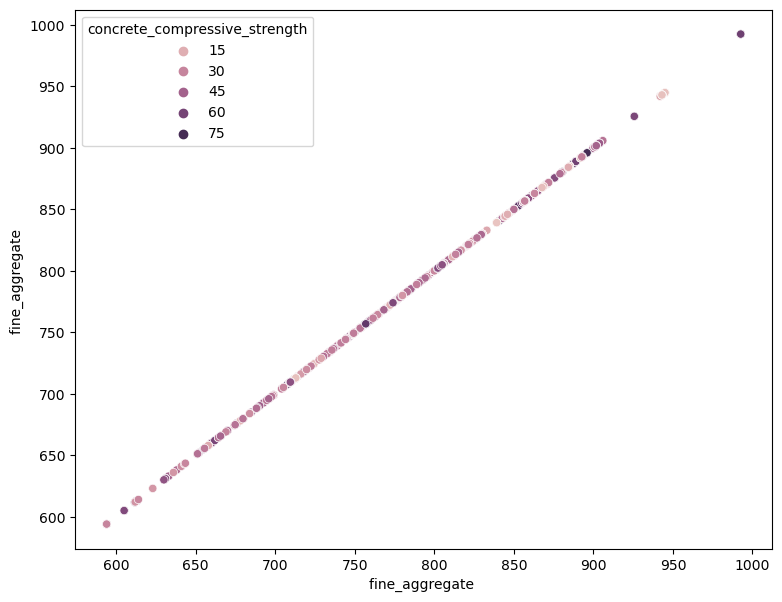

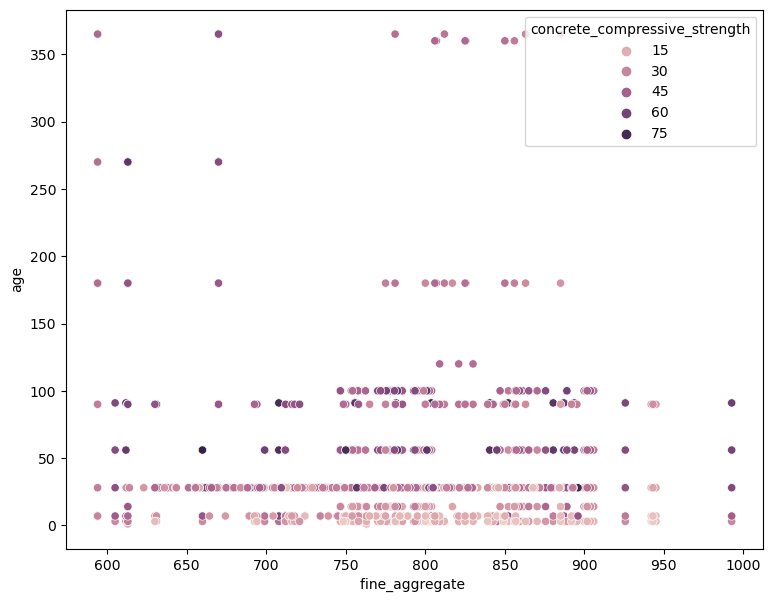

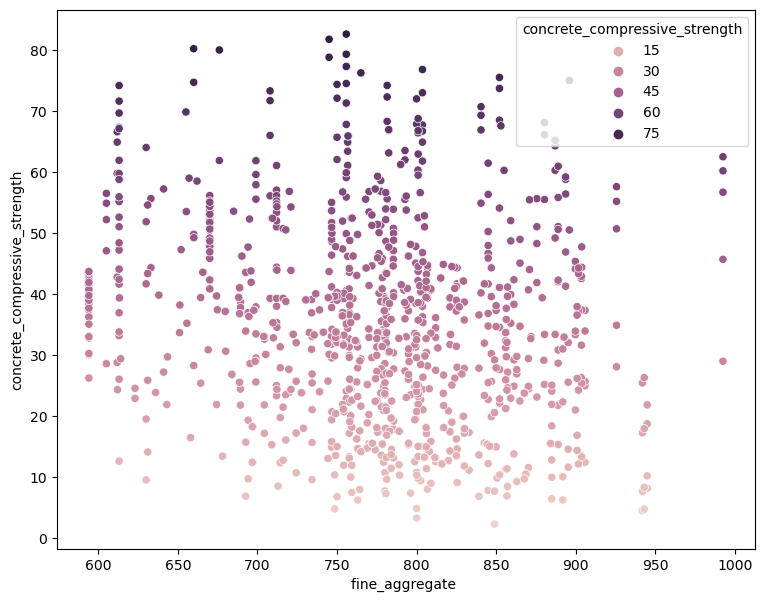

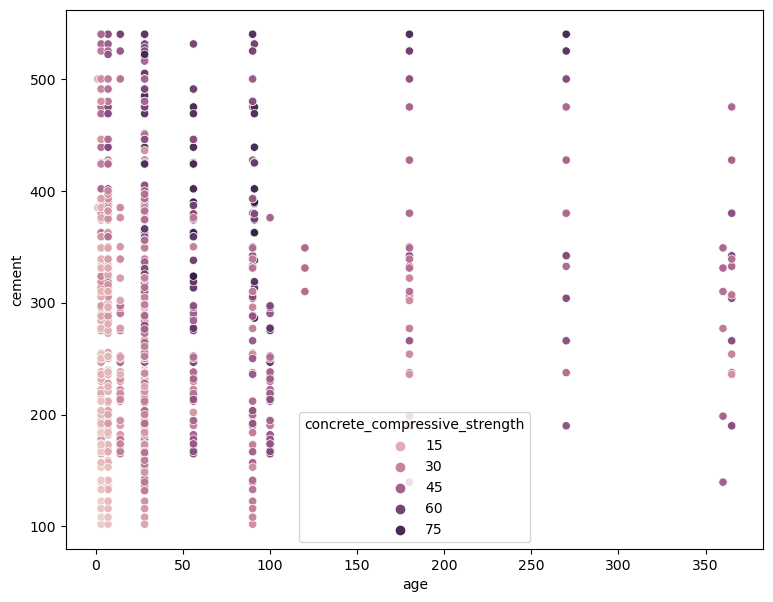

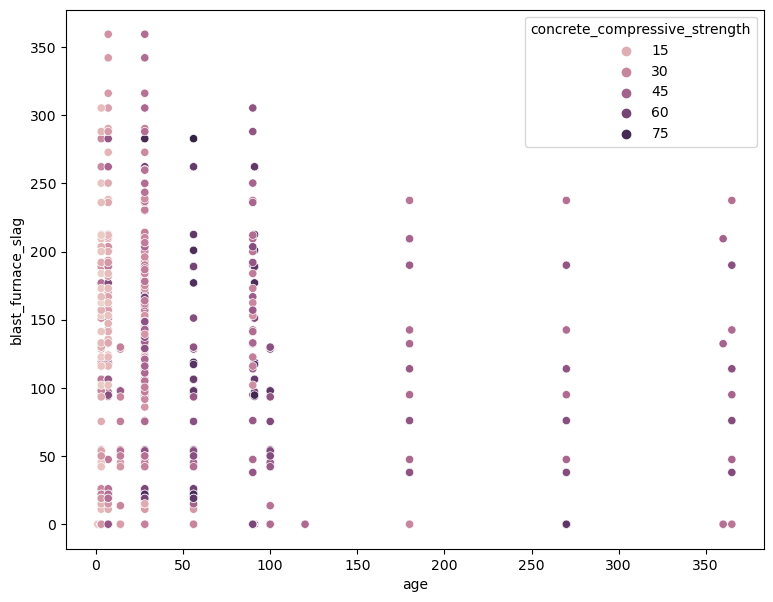

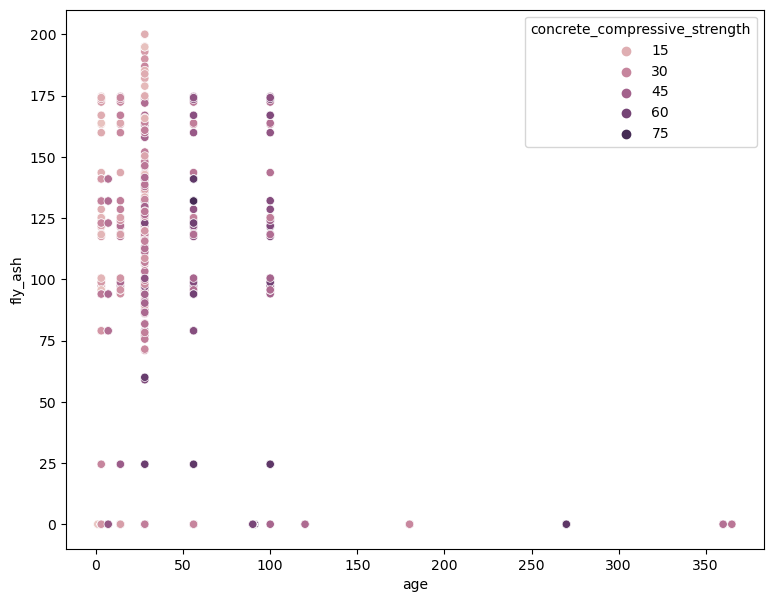

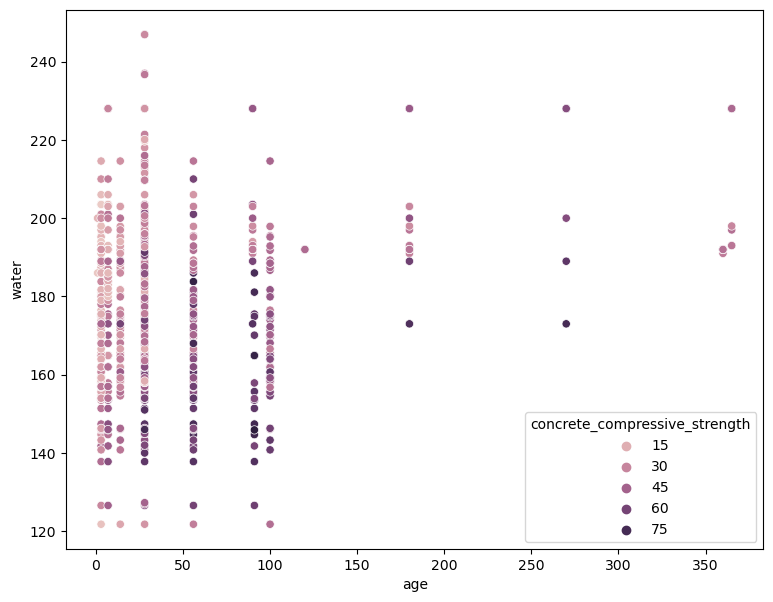

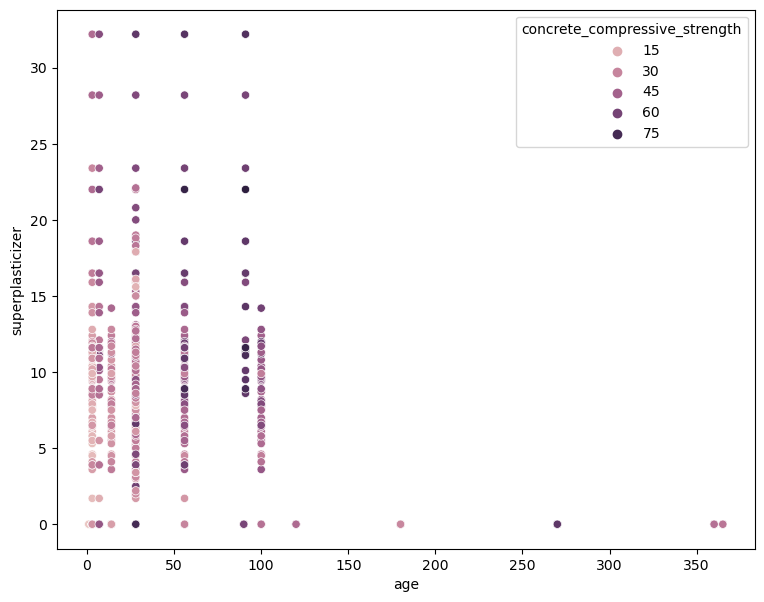

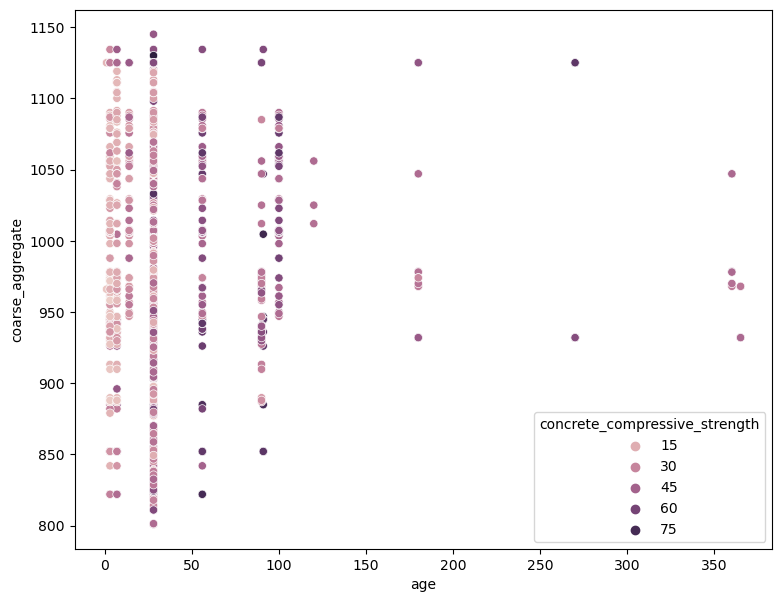

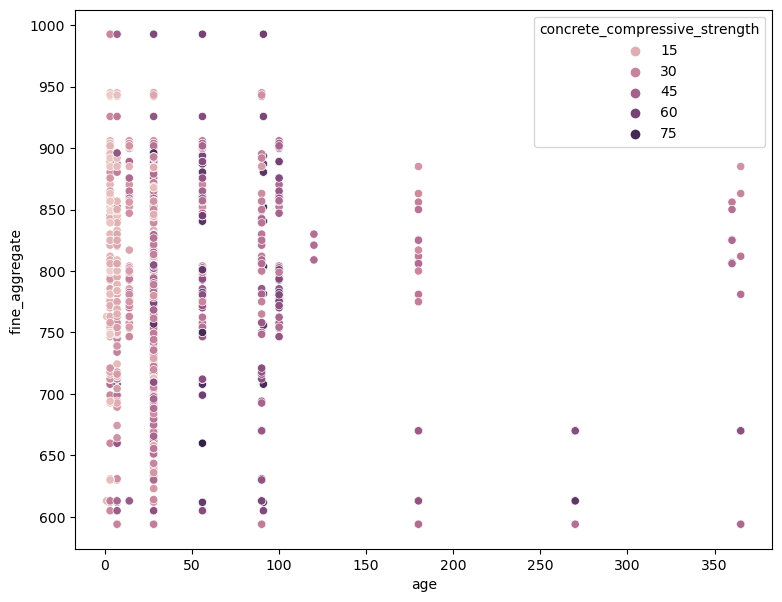

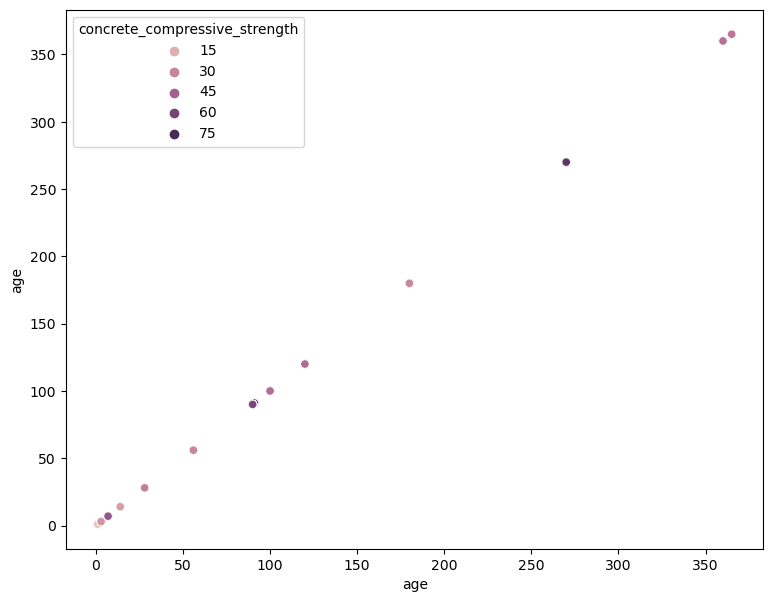

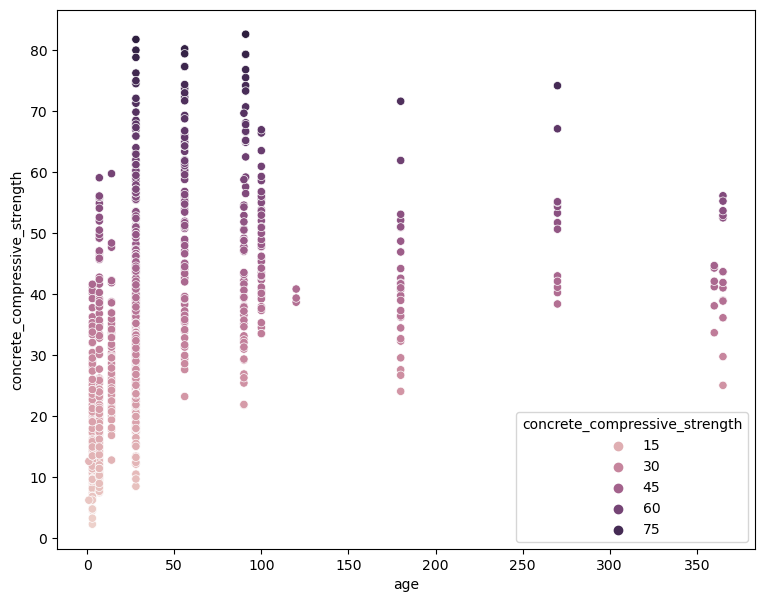

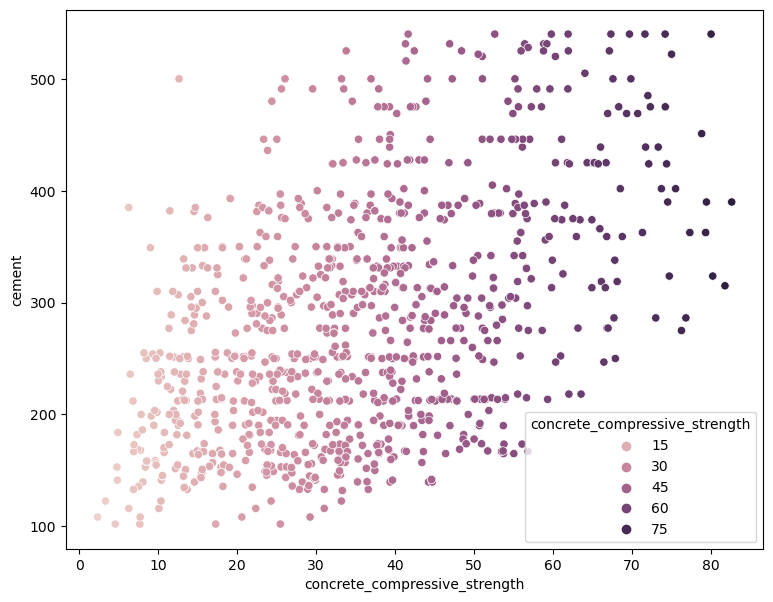

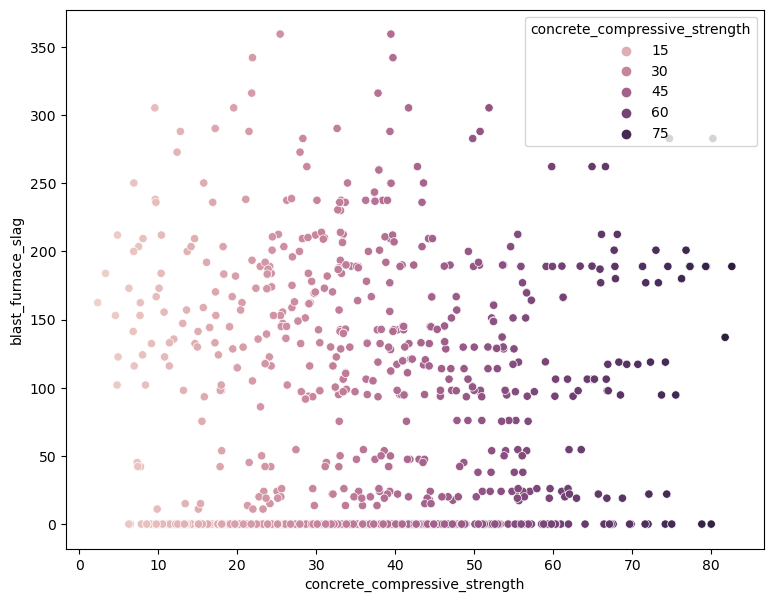

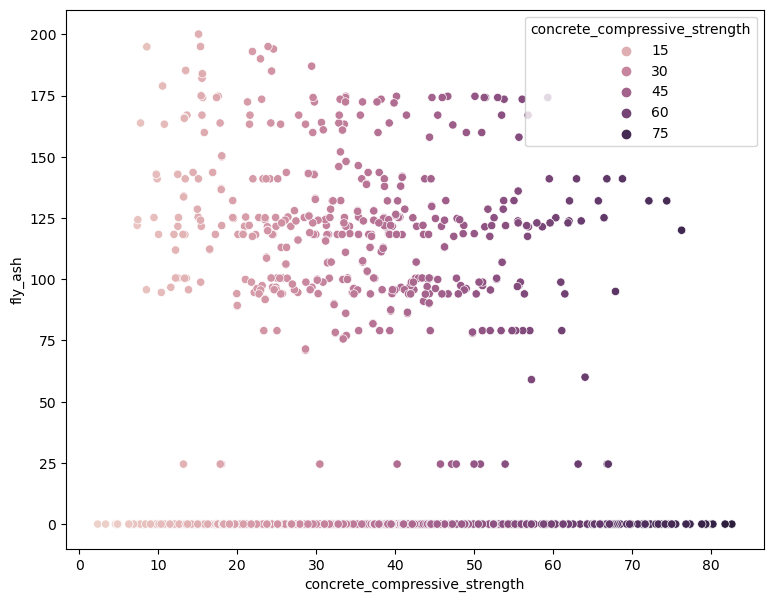

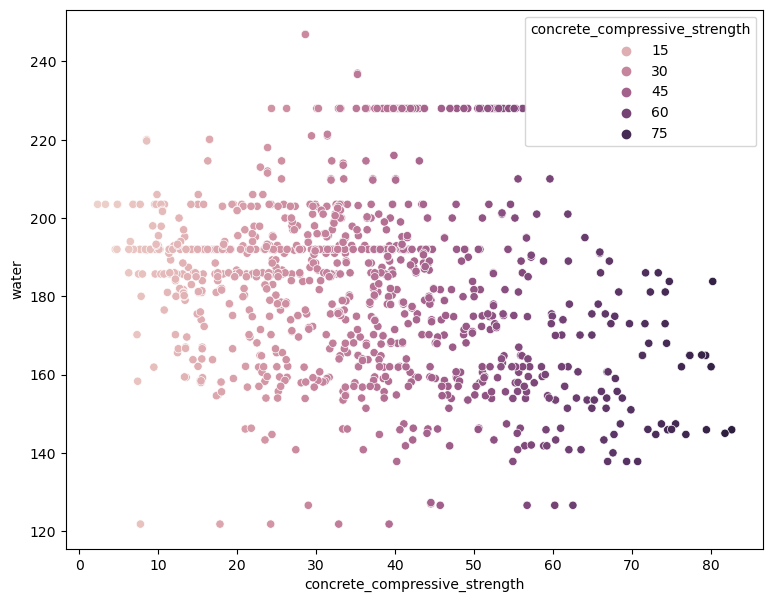

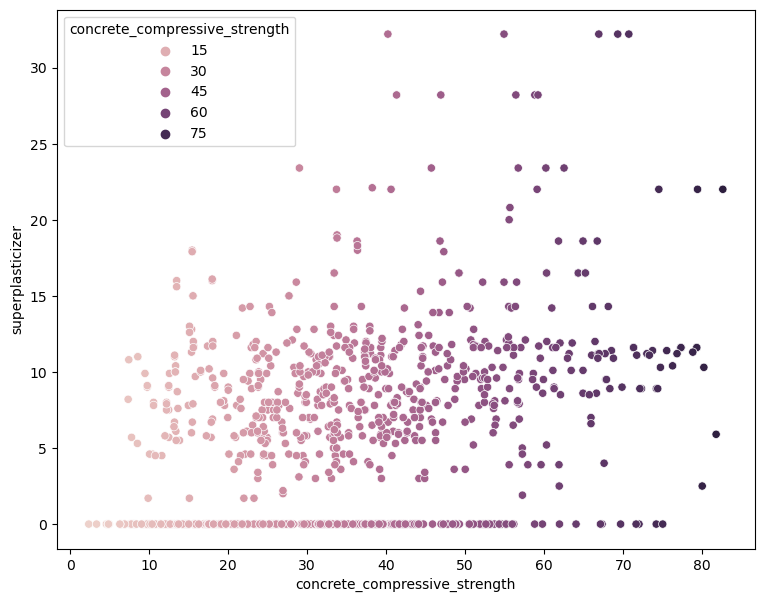

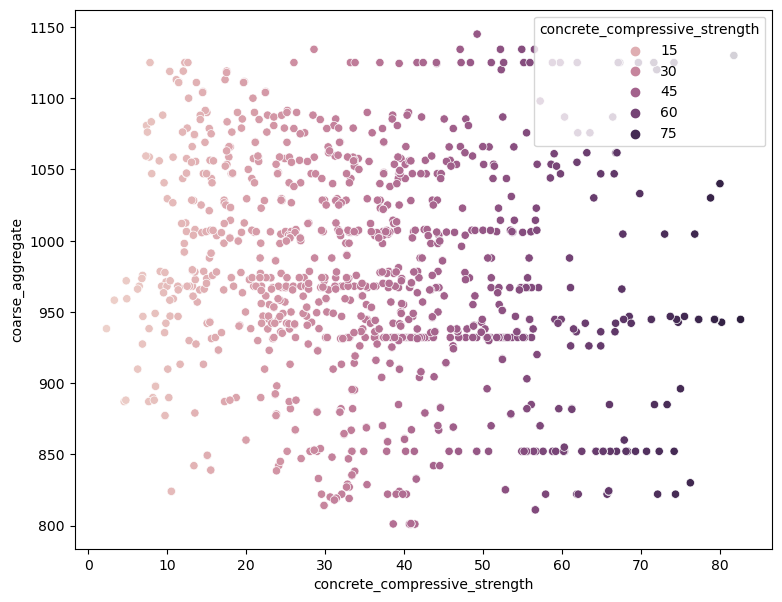

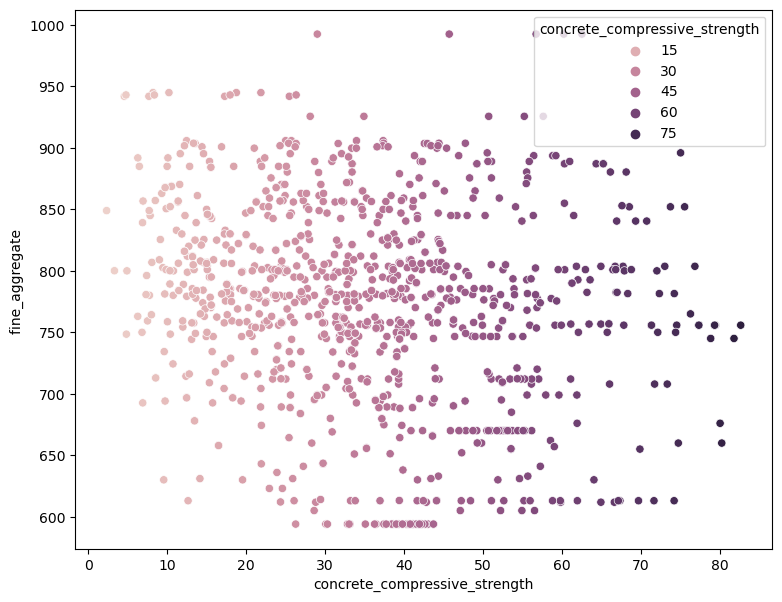

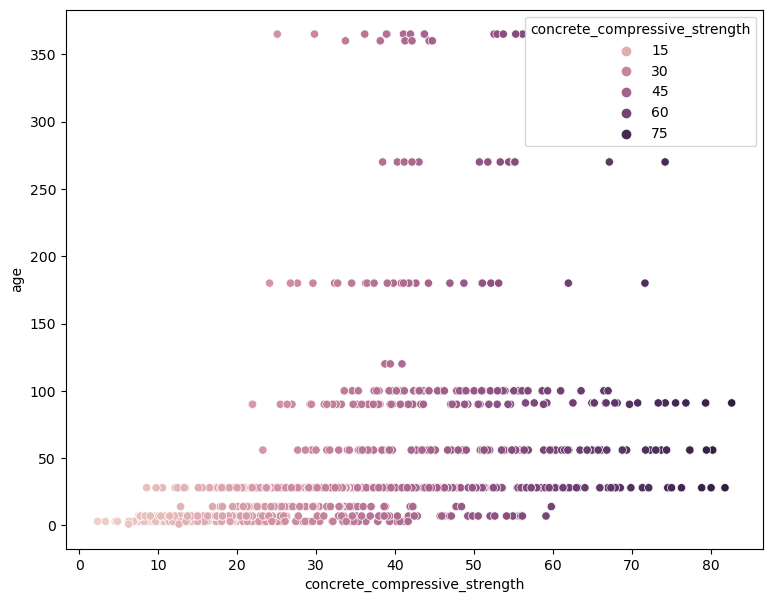

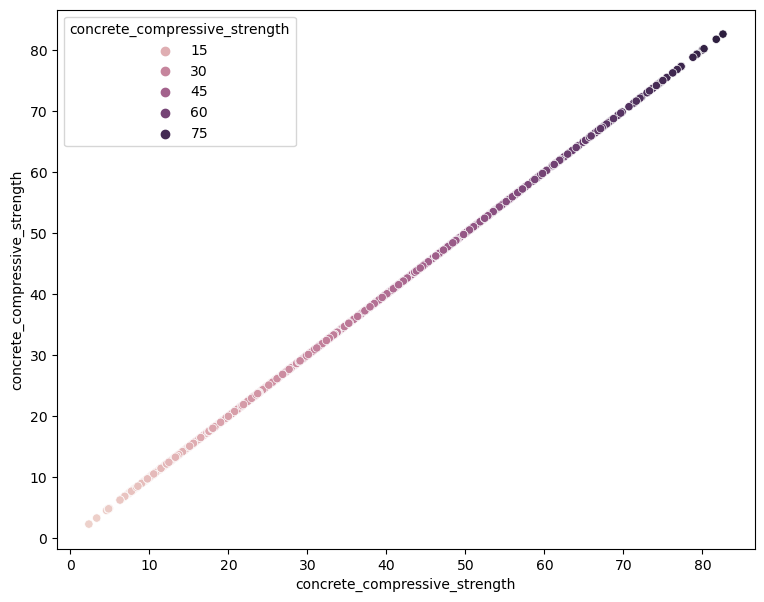

In [8]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i, y=j, hue='concrete_compressive_strength', data=df)
        plt.show()

## Outlier analysis

In [9]:
def outlier(data, column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))
    

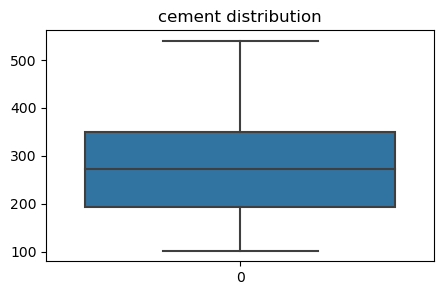

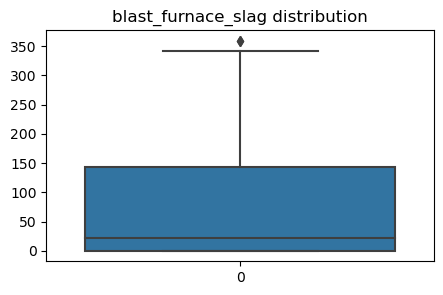

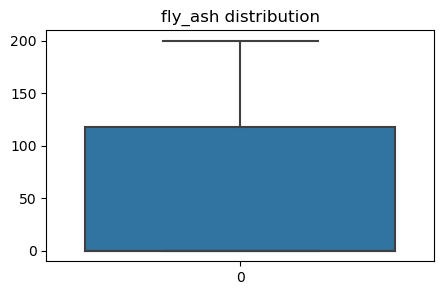

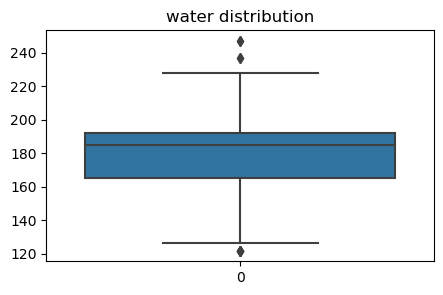

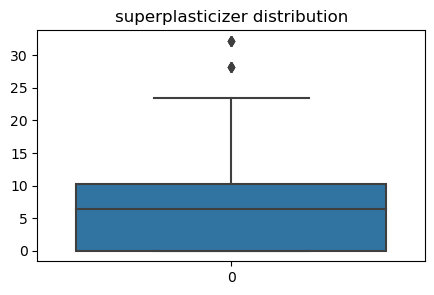

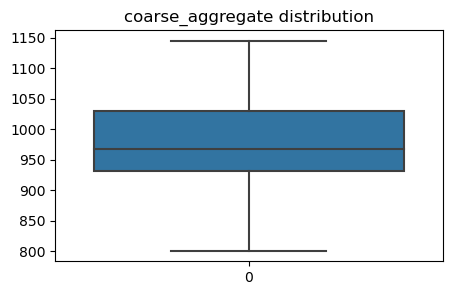

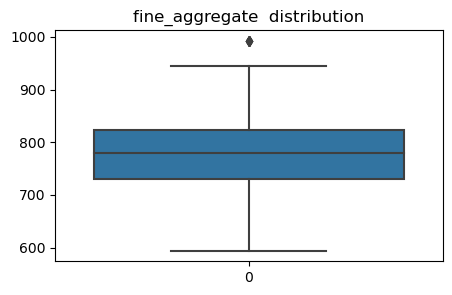

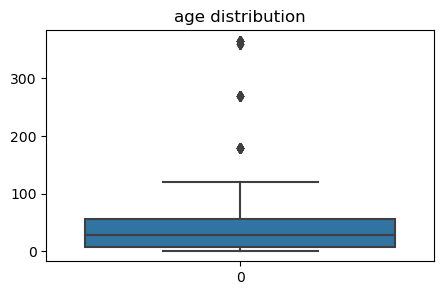

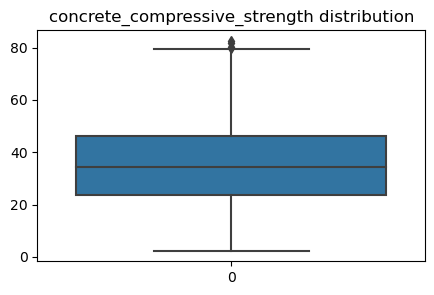

In [10]:
for i in df.columns:
    outlier(df, i)

### Finding the min and max value for every feature

In [11]:
def end_value_show(data,column):
    print("min value of {} is{} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

In [12]:
for i in df.columns:
    end_value_show(df, i)

min value of cement is102.0 
max value of cement is 540.0
min value of blast_furnace_slag is0.0 
max value of blast_furnace_slag is 359.4
min value of fly_ash is0.0 
max value of fly_ash is 200.1
min value of water is121.8 
max value of water is 247.0
min value of superplasticizer is0.0 
max value of superplasticizer is 32.2
min value of coarse_aggregate is801.0 
max value of coarse_aggregate is 1145.0
min value of fine_aggregate  is594.0 
max value of fine_aggregate  is 992.6
min value of age is1 
max value of age is 365
min value of concrete_compressive_strength is2.33 
max value of concrete_compressive_strength is 82.6


### Replacing the outliers

In [13]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

## Feature Engineering

In [14]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [15]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

In [16]:
df.columns

Index(['cement', 'fly_ash', 'water', 'superplasticizer', 'age',
       'concrete_compressive_strength'],
      dtype='object')

<AxesSubplot: >

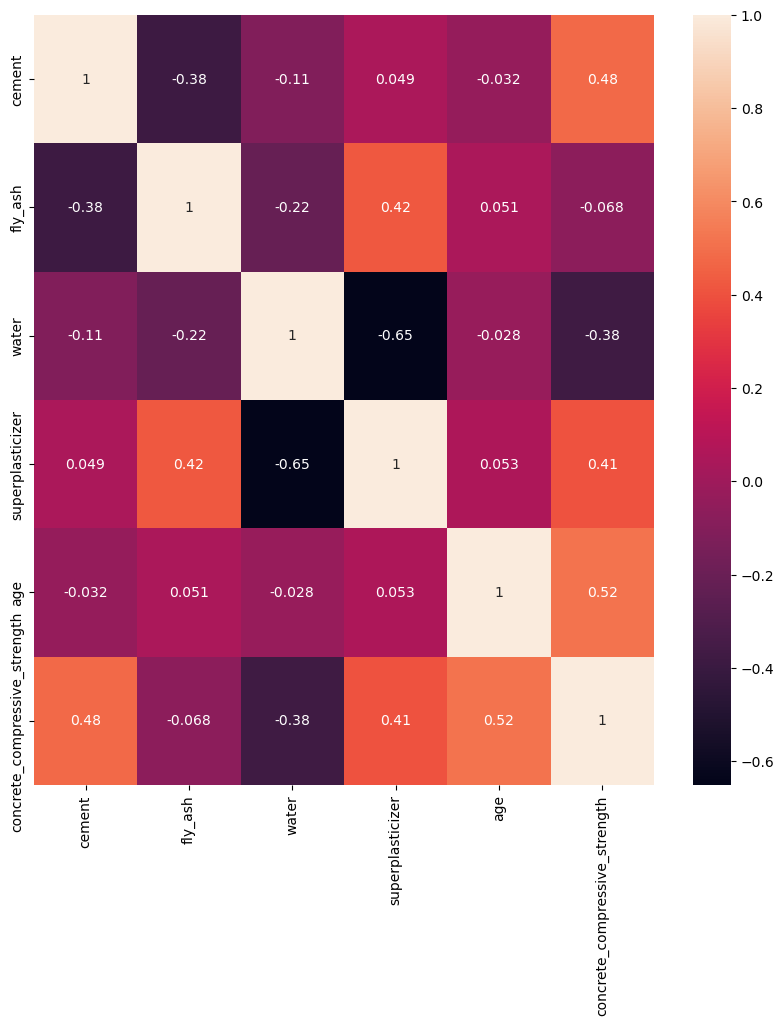

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Splitting the data

In [18]:
x=df.drop(["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [21]:
x_train.shape

(761, 5)

## Model building using DL
- ### We will be using keras Sequential for this project

In [22]:
from tensorflow.keras import models,layers

2023-01-06 21:42:31.029140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-06 21:42:31.029187: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [27]:
model=models.Sequential()
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100,activation='relu',input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5,activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [28]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test))

Epoch 1/100
761/761 [==============================] - 1s 1ms/step - loss: 1371.8479 - mae: 32.8755 - val_loss: 1134.5128 - val_mae: 29.3850
Epoch 2/100
761/761 [==============================] - 1s 1ms/step - loss: 1151.1123 - mae: 29.3752 - val_loss: 957.5182 - val_mae: 26.2383
Epoch 3/100
761/761 [==============================] - 1s 975us/step - loss: 961.4767 - mae: 26.1080 - val_loss: 799.5964 - val_mae: 23.2088
Epoch 4/100
761/761 [==============================] - 1s 1ms/step - loss: 803.0367 - mae: 23.2738 - val_loss: 665.8311 - val_mae: 20.6789
Epoch 5/100
761/761 [==============================] - 1s 1ms/step - loss: 674.0803 - mae: 20.8270 - val_loss: 557.7841 - val_mae: 18.6886
Epoch 6/100
761/761 [==============================] - 1s 1ms/step - loss: 578.4183 - mae: 18.9209 - val_loss: 474.3397 - val_mae: 17.0545
Epoch 7/100
761/761 [==============================] - 1s 1ms/step - loss: 510.3573 - mae: 17.6655 - val_loss: 412.6196 - val_mae: 15.7388
Epoch 8/100
761/761 [=

761/761 [==============================] - 1s 927us/step - loss: 316.2604 - mae: 14.0706 - val_loss: 271.2477 - val_mae: 13.3284
Epoch 60/100
761/761 [==============================] - 1s 936us/step - loss: 333.1945 - mae: 14.6733 - val_loss: 271.3005 - val_mae: 13.3230
Epoch 61/100
761/761 [==============================] - 1s 950us/step - loss: 312.4958 - mae: 14.2108 - val_loss: 271.2847 - val_mae: 13.3244
Epoch 62/100
761/761 [==============================] - 1s 960us/step - loss: 329.5323 - mae: 14.6227 - val_loss: 271.3344 - val_mae: 13.3202
Epoch 63/100
761/761 [==============================] - 1s 990us/step - loss: 322.3246 - mae: 14.3167 - val_loss: 271.2646 - val_mae: 13.3264
Epoch 64/100
761/761 [==============================] - 1s 951us/step - loss: 316.7318 - mae: 14.2969 - val_loss: 271.2804 - val_mae: 13.3248
Epoch 65/100
761/761 [==============================] - 1s 959us/step - loss: 317.3986 - mae: 14.2564 - val_loss: 271.2856 - val_mae: 13.3243
Epoch 66/100
761/76

In [29]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 271.2729 - mae: 13.3256


[271.2728576660156, 13.325579643249512]

In [30]:
pred = model.predict(x_test)
pred[4]

array([34.183243], dtype=float32)

# Using Auto Keras
- ## AutoKeras: An AdutoML system based on keras. It is developed by Data Lab at Texas A&M University

In [31]:
# !pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 kB 540.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 731.1 kB/s eta 0:00:001m920.6 kB/s eta 0:00:01


In [32]:
# !pip show autokeras

Name: autokeras
Version: 1.0.20
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /home/ubuntu/anaconda3/lib/python3.9/site-packages
Requires: keras-tuner, packaging, pandas, tensorflow
Required-by: 


In [33]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [34]:
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)

In [35]:
reg.fit(x = x_train, y = y_train, verbose = 0)

INFO:tensorflow:Oracle triggered exit
Epoch 1/931
24/24 [==============================] - 0s 1ms/step - loss: 1397.2430 - mean_squared_error: 1397.2430
Epoch 2/931
24/24 [==============================] - 0s 2ms/step - loss: 961.7079 - mean_squared_error: 961.7079
Epoch 3/931
24/24 [==============================] - 0s 2ms/step - loss: 385.0898 - mean_squared_error: 385.0898
Epoch 4/931
24/24 [==============================] - 0s 2ms/step - loss: 195.6263 - mean_squared_error: 195.6263
Epoch 5/931
24/24 [==============================] - 0s 2ms/step - loss: 181.8519 - mean_squared_error: 181.8519
Epoch 6/931
24/24 [==============================] - 0s 2ms/step - loss: 169.7676 - mean_squared_error: 169.7676
Epoch 7/931
24/24 [==============================] - 0s 2ms/step - loss: 163.3021 - mean_squared_error: 163.3021
Epoch 8/931
24/24 [==============================] - 0s 2ms/step - loss: 158.1643 - mean_squared_error: 158.1643
Epoch 9/931
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 2ms/step - loss: 84.7110 - mean_squared_error: 84.7110
Epoch 73/931
24/24 [==============================] - 0s 2ms/step - loss: 84.0179 - mean_squared_error: 84.0179
Epoch 74/931
24/24 [==============================] - 0s 2ms/step - loss: 83.3314 - mean_squared_error: 83.3314
Epoch 75/931
24/24 [==============================] - 0s 2ms/step - loss: 82.6403 - mean_squared_error: 82.6403
Epoch 76/931
24/24 [==============================] - 0s 2ms/step - loss: 81.9420 - mean_squared_error: 81.9420
Epoch 77/931
24/24 [==============================] - 0s 2ms/step - loss: 81.2437 - mean_squared_error: 81.2437
Epoch 78/931
24/24 [==============================] - 0s 2ms/step - loss: 80.5385 - mean_squared_error: 80.5385
Epoch 79/931
24/24 [==============================] - 0s 2ms/step - loss: 79.8474 - mean_squared_error: 79.8474
Epoch 80/931
24/24 [==============================] - 0s 2ms/step - loss: 79.1128 - mean_squared_error: 79.1128
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 57.2107 - mean_squared_error: 57.2107
Epoch 145/931
24/24 [==============================] - 0s 1ms/step - loss: 57.0728 - mean_squared_error: 57.0728
Epoch 146/931
24/24 [==============================] - 0s 2ms/step - loss: 56.9457 - mean_squared_error: 56.9457
Epoch 147/931
24/24 [==============================] - 0s 2ms/step - loss: 56.8186 - mean_squared_error: 56.8186
Epoch 148/931
24/24 [==============================] - 0s 2ms/step - loss: 56.6896 - mean_squared_error: 56.6896
Epoch 149/931
24/24 [==============================] - 0s 2ms/step - loss: 56.5594 - mean_squared_error: 56.5594
Epoch 150/931
24/24 [==============================] - 0s 2ms/step - loss: 56.3197 - mean_squared_error: 56.3197
Epoch 151/931
24/24 [==============================] - 0s 1ms/step - loss: 56.4261 - mean_squared_error: 56.4261
Epoch 152/931
24/24 [==============================] - 0s 2ms/step - loss: 56.2465 - mean_squared_error: 56.24

24/24 [==============================] - 0s 1ms/step - loss: 50.1298 - mean_squared_error: 50.1298
Epoch 217/931
24/24 [==============================] - 0s 2ms/step - loss: 50.0491 - mean_squared_error: 50.0491
Epoch 218/931
24/24 [==============================] - 0s 2ms/step - loss: 49.9679 - mean_squared_error: 49.9679
Epoch 219/931
24/24 [==============================] - 0s 2ms/step - loss: 49.8974 - mean_squared_error: 49.8974
Epoch 220/931
24/24 [==============================] - 0s 2ms/step - loss: 49.8212 - mean_squared_error: 49.8212
Epoch 221/931
24/24 [==============================] - 0s 2ms/step - loss: 49.7453 - mean_squared_error: 49.7453
Epoch 222/931
24/24 [==============================] - 0s 1ms/step - loss: 49.6521 - mean_squared_error: 49.6521
Epoch 223/931
24/24 [==============================] - 0s 2ms/step - loss: 49.5867 - mean_squared_error: 49.5867
Epoch 224/931
24/24 [==============================] - 0s 1ms/step - loss: 49.5080 - mean_squared_error: 49.50

24/24 [==============================] - 0s 2ms/step - loss: 44.7029 - mean_squared_error: 44.7029
Epoch 289/931
24/24 [==============================] - 0s 2ms/step - loss: 44.6125 - mean_squared_error: 44.6125
Epoch 290/931
24/24 [==============================] - 0s 2ms/step - loss: 44.5384 - mean_squared_error: 44.5384
Epoch 291/931
24/24 [==============================] - 0s 2ms/step - loss: 44.4762 - mean_squared_error: 44.4762
Epoch 292/931
24/24 [==============================] - 0s 2ms/step - loss: 44.3967 - mean_squared_error: 44.3967
Epoch 293/931
24/24 [==============================] - 0s 2ms/step - loss: 44.3219 - mean_squared_error: 44.3219
Epoch 294/931
24/24 [==============================] - 0s 2ms/step - loss: 44.2531 - mean_squared_error: 44.2531
Epoch 295/931
24/24 [==============================] - 0s 1ms/step - loss: 44.1762 - mean_squared_error: 44.1762
Epoch 296/931
24/24 [==============================] - 0s 2ms/step - loss: 44.0940 - mean_squared_error: 44.09

24/24 [==============================] - 0s 1ms/step - loss: 39.4270 - mean_squared_error: 39.4270
Epoch 361/931
24/24 [==============================] - 0s 2ms/step - loss: 39.3564 - mean_squared_error: 39.3564
Epoch 362/931
24/24 [==============================] - 0s 1ms/step - loss: 39.2908 - mean_squared_error: 39.2908
Epoch 363/931
24/24 [==============================] - 0s 1ms/step - loss: 39.2200 - mean_squared_error: 39.2200
Epoch 364/931
24/24 [==============================] - 0s 1ms/step - loss: 39.1495 - mean_squared_error: 39.1495
Epoch 365/931
24/24 [==============================] - 0s 2ms/step - loss: 39.0847 - mean_squared_error: 39.0847
Epoch 366/931
24/24 [==============================] - 0s 2ms/step - loss: 39.0035 - mean_squared_error: 39.0035
Epoch 367/931
24/24 [==============================] - 0s 1ms/step - loss: 38.9160 - mean_squared_error: 38.9160
Epoch 368/931
24/24 [==============================] - 0s 2ms/step - loss: 38.8543 - mean_squared_error: 38.85

24/24 [==============================] - 0s 2ms/step - loss: 34.4595 - mean_squared_error: 34.4595
Epoch 433/931
24/24 [==============================] - 0s 1ms/step - loss: 34.4004 - mean_squared_error: 34.4004
Epoch 434/931
24/24 [==============================] - 0s 2ms/step - loss: 34.3383 - mean_squared_error: 34.3383
Epoch 435/931
24/24 [==============================] - 0s 1ms/step - loss: 34.2583 - mean_squared_error: 34.2583
Epoch 436/931
24/24 [==============================] - 0s 1ms/step - loss: 34.1976 - mean_squared_error: 34.1976
Epoch 437/931
24/24 [==============================] - 0s 2ms/step - loss: 34.1275 - mean_squared_error: 34.1275
Epoch 438/931
24/24 [==============================] - 0s 2ms/step - loss: 34.0617 - mean_squared_error: 34.0617
Epoch 439/931
24/24 [==============================] - 0s 2ms/step - loss: 34.0067 - mean_squared_error: 34.0067
Epoch 440/931
24/24 [==============================] - 0s 2ms/step - loss: 33.9499 - mean_squared_error: 33.94

24/24 [==============================] - 0s 2ms/step - loss: 30.2886 - mean_squared_error: 30.2886
Epoch 505/931
24/24 [==============================] - 0s 2ms/step - loss: 30.2317 - mean_squared_error: 30.2317
Epoch 506/931
24/24 [==============================] - 0s 2ms/step - loss: 30.1879 - mean_squared_error: 30.1879
Epoch 507/931
24/24 [==============================] - 0s 2ms/step - loss: 30.1363 - mean_squared_error: 30.1363
Epoch 508/931
24/24 [==============================] - 0s 2ms/step - loss: 30.0722 - mean_squared_error: 30.0722
Epoch 509/931
24/24 [==============================] - 0s 1ms/step - loss: 30.0378 - mean_squared_error: 30.0378
Epoch 510/931
24/24 [==============================] - 0s 1ms/step - loss: 29.9880 - mean_squared_error: 29.9880
Epoch 511/931
24/24 [==============================] - 0s 1ms/step - loss: 29.9228 - mean_squared_error: 29.9228
Epoch 512/931
24/24 [==============================] - 0s 1ms/step - loss: 29.8897 - mean_squared_error: 29.88

24/24 [==============================] - 0s 2ms/step - loss: 27.1839 - mean_squared_error: 27.1839
Epoch 577/931
24/24 [==============================] - 0s 1ms/step - loss: 27.1310 - mean_squared_error: 27.1310
Epoch 578/931
24/24 [==============================] - 0s 2ms/step - loss: 27.0919 - mean_squared_error: 27.0919
Epoch 579/931
24/24 [==============================] - 0s 2ms/step - loss: 27.0747 - mean_squared_error: 27.0747
Epoch 580/931
24/24 [==============================] - 0s 2ms/step - loss: 27.0235 - mean_squared_error: 27.0235
Epoch 581/931
24/24 [==============================] - 0s 1ms/step - loss: 26.9874 - mean_squared_error: 26.9874
Epoch 582/931
24/24 [==============================] - 0s 2ms/step - loss: 26.9616 - mean_squared_error: 26.9616
Epoch 583/931
24/24 [==============================] - 0s 2ms/step - loss: 26.9370 - mean_squared_error: 26.9370
Epoch 584/931
24/24 [==============================] - 0s 2ms/step - loss: 26.8583 - mean_squared_error: 26.85

24/24 [==============================] - 0s 2ms/step - loss: 24.8943 - mean_squared_error: 24.8943
Epoch 649/931
24/24 [==============================] - 0s 2ms/step - loss: 24.8438 - mean_squared_error: 24.8438
Epoch 650/931
24/24 [==============================] - 0s 1ms/step - loss: 24.8339 - mean_squared_error: 24.8339
Epoch 651/931
24/24 [==============================] - 0s 1ms/step - loss: 24.8088 - mean_squared_error: 24.8088
Epoch 652/931
24/24 [==============================] - 0s 1ms/step - loss: 24.7908 - mean_squared_error: 24.7908
Epoch 653/931
24/24 [==============================] - 0s 2ms/step - loss: 24.7567 - mean_squared_error: 24.7567
Epoch 654/931
24/24 [==============================] - 0s 2ms/step - loss: 24.7180 - mean_squared_error: 24.7180
Epoch 655/931
24/24 [==============================] - 0s 1ms/step - loss: 24.7235 - mean_squared_error: 24.7235
Epoch 656/931
24/24 [==============================] - 0s 2ms/step - loss: 24.6536 - mean_squared_error: 24.65

24/24 [==============================] - 0s 1ms/step - loss: 23.1020 - mean_squared_error: 23.1020
Epoch 721/931
24/24 [==============================] - 0s 2ms/step - loss: 23.0531 - mean_squared_error: 23.0531
Epoch 722/931
24/24 [==============================] - 0s 1ms/step - loss: 23.0391 - mean_squared_error: 23.0391
Epoch 723/931
24/24 [==============================] - 0s 1ms/step - loss: 23.0313 - mean_squared_error: 23.0313
Epoch 724/931
24/24 [==============================] - 0s 1ms/step - loss: 23.0156 - mean_squared_error: 23.0156
Epoch 725/931
24/24 [==============================] - 0s 1ms/step - loss: 22.9725 - mean_squared_error: 22.9725
Epoch 726/931
24/24 [==============================] - 0s 2ms/step - loss: 22.9557 - mean_squared_error: 22.9557
Epoch 727/931
24/24 [==============================] - 0s 2ms/step - loss: 22.9515 - mean_squared_error: 22.9515
Epoch 728/931
24/24 [==============================] - 0s 2ms/step - loss: 22.9162 - mean_squared_error: 22.91

24/24 [==============================] - 0s 2ms/step - loss: 21.6532 - mean_squared_error: 21.6532
Epoch 793/931
24/24 [==============================] - 0s 2ms/step - loss: 21.6239 - mean_squared_error: 21.6239
Epoch 794/931
24/24 [==============================] - 0s 1ms/step - loss: 21.5922 - mean_squared_error: 21.5922
Epoch 795/931
24/24 [==============================] - 0s 2ms/step - loss: 21.6097 - mean_squared_error: 21.6097
Epoch 796/931
24/24 [==============================] - 0s 1ms/step - loss: 21.5518 - mean_squared_error: 21.5518
Epoch 797/931
24/24 [==============================] - 0s 2ms/step - loss: 21.5448 - mean_squared_error: 21.5448
Epoch 798/931
24/24 [==============================] - 0s 2ms/step - loss: 21.5211 - mean_squared_error: 21.5211
Epoch 799/931
24/24 [==============================] - 0s 1ms/step - loss: 21.5061 - mean_squared_error: 21.5061
Epoch 800/931
24/24 [==============================] - 0s 1ms/step - loss: 21.4875 - mean_squared_error: 21.48

24/24 [==============================] - 0s 1ms/step - loss: 20.4044 - mean_squared_error: 20.4044
Epoch 865/931
24/24 [==============================] - 0s 1ms/step - loss: 20.3806 - mean_squared_error: 20.3806
Epoch 866/931
24/24 [==============================] - 0s 2ms/step - loss: 20.4035 - mean_squared_error: 20.4035
Epoch 867/931
24/24 [==============================] - 0s 2ms/step - loss: 20.3660 - mean_squared_error: 20.3660
Epoch 868/931
24/24 [==============================] - 0s 2ms/step - loss: 20.3872 - mean_squared_error: 20.3872
Epoch 869/931
24/24 [==============================] - 0s 2ms/step - loss: 20.3105 - mean_squared_error: 20.3105
Epoch 870/931
24/24 [==============================] - 0s 2ms/step - loss: 20.3793 - mean_squared_error: 20.3793
Epoch 871/931
24/24 [==============================] - 0s 2ms/step - loss: 20.2670 - mean_squared_error: 20.2670
Epoch 872/931
24/24 [==============================] - 0s 1ms/step - loss: 20.3132 - mean_squared_error: 20.31

2023-01-06 22:03:10.243898: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [36]:
# evaluate the model
mae, _  = reg.evaluate(x_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(x_test)

# get the best performing model
model = reg.export_model()



6/6 [==============================] - 0s 1ms/step


In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 5)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               3072      
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416 

In [38]:
yhat_test

array([[34.282433 ],
       [18.816353 ],
       [21.634645 ],
       [70.35252  ],
       [37.049973 ],
       [29.866732 ],
       [26.847744 ],
       [47.907616 ],
       [13.839959 ],
       [30.5836   ],
       [41.428085 ],
       [43.799305 ],
       [17.660511 ],
       [30.21949  ],
       [39.178314 ],
       [55.691284 ],
       [22.438852 ],
       [18.221073 ],
       [48.52465  ],
       [35.639484 ],
       [34.075188 ],
       [34.641846 ],
       [39.086067 ],
       [39.026382 ],
       [43.443886 ],
       [43.36035  ],
       [43.50173  ],
       [34.72443  ],
       [30.448898 ],
       [18.580631 ],
       [32.770645 ],
       [12.370751 ],
       [22.262867 ],
       [29.658386 ],
       [48.782677 ],
       [38.361706 ],
       [39.49201  ],
       [14.861979 ],
       [48.987118 ],
       [ 3.55586  ],
       [18.692024 ],
       [15.0733   ],
       [13.7892275],
       [22.637583 ],
       [45.930954 ],
       [ 9.487292 ],
       [27.43395  ],
       [21.19

In [39]:
y_test

206    24.90
309    22.95
582    25.73
182    79.30
720    51.86
       ...  
966    12.46
642    20.87
578    17.20
412    15.52
743    36.94
Name: concrete_compressive_strength, Length: 191, dtype: float64